#Исходные данные

проект в GitHub

https://github.com/terrainternship/Radlogics

**Управление файлами в Google Colab**

https://medium.com/nuances-of-programming/%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D1%84%D0%B0%D0%B9%D0%BB%D0%B0%D0%BC%D0%B8-%D0%B2-google-colab-8ea813ca20ab

форма для вопросов заказчику

https://docs.google.com/spreadsheets/d/1t8jnHupBSC5hmIn4Rbf7rmR4UbTL9xSGItKXPakkb0E/edit#gid=0

данные для датасета из медицинского репозитория

https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=68551327#685513270a399f0788834f03a790298161149ef6

документ по снимкам

https://radiologyupdate.org/f/2018/10/CT%20scan%20attenuation%20value%20measurement%20as%20a%20diag-%20nostic%20tool%20for%20patients%20with%20pleural%20e%20usions-2.pdf

ссылка на общую папку (на Гугле диске Андрея С.): https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76

ссылка на папку Archive с файлом Dataset.zip: https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l

ссылка на Dataset.zip: https://drive.google.com/file/d/1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG/view?usp=share_link


ID файла = 1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG

**библиотеки, программы для работы со снимками:**

**MultiVox Dicom Viewer**	программа для просмотра файлов DICOM

-----------------------------------

Для просмотра изображений .dcm подойдет совместимая с форматом DICOM программа, например, бесплатный графический редактор **GIMP** - https://open-file.ru/programs/gimp

**nibabel** - библиотека для чтения и записи файлов изображений и данных медицинской области, таких как MRI и CT сканы. Она поддерживает множество форматов файлов, включая NIfTI, MINC, Analyze и DICOM.

Метод get_data позволяет сэкономить память и получать отдельные срезы (в отличие от get_fdata).

Он вроде как Deprecated, поэтому на время его пользования можно отключать предупреждения:

warnings.filterwarnings('ignore')

img_eff.get_data()[:, :, img_slice]

warnings.filterwarnings('default')

**pydicom** - пакет Python для обработки файлов формата DICOM, который может обрабатывать, включая медицинские изображения (КТ и т. Д.) и отчеты: https://pydicom.github.io/pydicom/stable/auto_examples/index.html

формат DICOM - https://dicom.nema.org/medical/dicom/current/output/chtml/part10/chapter_7.html


**полезная информация**

максимальное число срезов из аппарата КТ = 300

Файл с расширением .dcm. Чем открыть, описание – 3 формата файла: https://open-file.ru/types/dcm

статья про dcm "Анализ файлов dicom" - https://russianblogs.com/article/24941332478/

https://habr.com/ru/articles/252429/

Компьютерная томография сохраняет в файлах рентгеновскую плотность, которая зависит от физической плотности тканей. Кости имеют большую физическую плотность, кровь меньшую и т.д.

Информацию о плотности в DICOM-файле можно представить в виде обычного изображения, у которого есть разрешение, размер пикселя, формат и другие данные. Только вместо информации о цвете в пикселе храниться информация о плотности тканей.

Диагностическая станция производит не один файл, а сразу несколько для одного исследования. Эти фалы имеют логическую структуру. Файлы объединяются в серии и представляют собой набор последовательных срезов какого-либо органа. Серии объединяются в стадии. Стадия определяет всё исследование. Последовательность серий в стадии определяется протоколом исследования.

Пиксель – это наименьший цифровой элемент КТ-изображения, видеть детали менее размера пикселя невозможно. Чтобы узнать размер пикселя, необходимо размер поля реконструкции разделить на размер матрицы реконструкции, которая в современных томографах составляет 512×512. 
Например, если при КТ грудной полости исходное поле реконструкции 40×40 см, то размер пикселя составит 400 мм/512 = 0,8×0,8 мм.

Шкала КТ-плотностей (шкала Хаунсфилда) включает 4096 значений –от -1024 до +3071 единиц Хаунсфилда (HU).

С помощью окна визуализации осуществляется регулировка яркости и контрастности КТ-изображений таким образом, чтобы на экране монитора в шкале серого цвета (256 оттенков серого) были видны только ткани требуемого диапазона плотностей – определенного участка шкалы Хаунсфилда: ткани с меньшей плотностью будут перекрыты черным цветом, ткани с большей плотностью – белым.

Окно визуализации характеризуется параметрами ширины и центра. Ширина окна – это величина разности наибольшего и наименьшего значений КТ чисел, отображаемых на экране монитора в шкале серого цвета. Центр, или уровень, окна – это значение КТ числа, расположенного по середине между наибольшим и наименьшим значениями отображаемого диапазона КТ чисел. Центр окна должен быть как можно ближе к значению плотности тканей, которые требуется отобразить наилучшим образом.

Наконец, не следует забывать о зависимости КТ-чисел от напряжения в рентгеновской трубке. При сканировании пациента на разных томографах или том же аппарате с различными значениями киловольт плотность одного и того же образования может отличаться (больше киловольты – ниже плотность).

https://trauma.ru/content/articles/detail.php?ELEMENT_ID=20460&ysclid=lhozxgb7h766650199

Формат **png**

Диапазон значений, используемый в пикселях для изображений в формате PNG, обычно составляет от 0 до 255. Это означает, что каждый пиксель может иметь значение яркости от полностью черного (0) до полностью белого (255), а также все промежуточные значения. Однако, в некоторых случаях могут использоваться другие диапазоны значений, например, для изображений с более высоким разрешением (16 бит на канал) может использоваться диапазон от 0 до 65535.

**Функция tifffile.TiffFile** 

предназначена для чтения файлов формата TIFF. Она возвращает объект TiffFile, который представляет собой последовательность страниц (изображений) в файле TIFF.

С помощью метода TiffFile.pages можно получить список страниц в файле. Каждая страница представлена объектом TiffPage, который содержит информацию о размере изображения, типе данных, количестве каналов и других параметрах.

Методы TiffPage.asarray и TiffPage.toarray позволяют преобразовать изображение в numpy массив. Метод TiffPage.save сохраняет страницу в новый файл.

Также объект TiffFile имеет атрибут tags, который содержит информацию о метаданных файла TIFF, таких как дата создания, автор, разрешение и другие параметры.

Функция tifffile.TiffFile поддерживает чтение файлов формата TIFF в различных кодировках и сжатиях, включая LZW, JPEG, PackBits и другие.

##**Ответы от заказчика**



Пиксели в дайкоме означают (условную) плотность ткани.

Формула для перевода значений пикселя в HU (Hounsfield Unit - единицы измерения этой радиоплотности) такова:

**HU = Pixel Value x Rescale Slope + Rescale Intercept** 

значения Rescale Slope и Rescale Intercept содержатся в соответствующих дайком тегах: (0028,1053) и (0028,1052)

В нашем случае значение Rescale Intercept будет, обычно, равно -1024 - его же и можно использовать как нейтральное значение HU, т.к. это то значение, которое, согласно формуле, получится при значении пикселя = 0.


Допустимые методы искажения снимков (dcm) для увеличения данных (ответ от заказчика):

- поворот
- отражение
- наклон
- шум
- искажения 

Эти варианты мы часто используем, и они могут оказаться полезными и для данной патологии.


In [ ]:
# Важные теги в файле dcm

# (0018, 0050) Slice Thickness                     DS: '5.0'
# (0018, 0088) Spacing Between Slices              DS: '5.0'
# (0020, 0013) Instance Number                     IS: '1'
# (0020, 0032) Image Position (Patient)            DS: [-158.135803, -179.035797, -75.699997]
# (0020, 1041) Slice Location                      DS: '-77.2040634155'
# (0028, 0002) Samples per Pixel                   US: 1
# (0028, 0010) Rows                                US: 128
# (0028, 0011) Columns                             US: 128
# (0028, 0030) Pixel Spacing                       DS: [0.661468, 0.661468]
# (0028, 0103) Pixel Representation                US: 1
# (0028, 0106) Smallest Image Pixel Value          US: 0
# (0028, 0107) Largest Image Pixel Value           US: 2535
# (0028, 0120) Pixel Padding Value                 SS: -2000                    указывает значение заполнения пикселей, которые не содержат информации об изображении.
#                                                                               не во всех срезах есть!!!
# (0028, 1052) Rescale Intercept                   DS: '-1024.0'
# (0028, 1053) Rescale Slope                       DS: '1.0'
# (7fe0, 0010) Pixel Data                          OW: Array of 524288 elements

Сортировка dcm-файлов:

лучше опираться на DICOM метаданные, а не на имя файла при сопоставлении. А именно на тег **Instance Number**

#Установка

In [ ]:
#@title проверка наличия, установка двух модулей для работы с nii.gz и dcm файлами

# нужные модули
needed_packages = ["nibabel", "pydicom"]

# проверяем список уже установленных модулей, выбираем из него нужные модули
import subprocess                                                      # для запуска команды

output = subprocess.check_output(['pip', 'freeze']).decode('utf-8')    # вывод от команды "!pip freeze" в виде байтов и декодирование в набор строк
packages = output.split(sep='\n')                                      # получаем список модулей

print("Список всех установленных сторонних модулей:")
print(packages)
print()

installed_packages = [pack.split("==")[0] for pack in packages if pack.split("==")[0] in needed_packages]
print("Список уже установленных необходимых модулей:")
print(installed_packages)
print()

# устанавливаем те модули из числа необходимых, которые еще не установлены
for pack in needed_packages:
  if pack not in installed_packages:
    print(f"Установка модуля: {pack}")
    !pip install $pack

Список всех установленных сторонних модулей:
['absl-py==1.4.0', 'alabaster==0.7.13', 'albumentations==1.2.1', 'altair==4.2.2', 'anyio==3.6.2', 'appdirs==1.4.4', 'argon2-cffi==21.3.0', 'argon2-cffi-bindings==21.2.0', 'array-record==0.2.0', 'arviz==0.15.1', 'astropy==5.2.2', 'astunparse==1.6.3', 'attrs==23.1.0', 'audioread==3.0.0', 'autograd==1.5', 'Babel==2.12.1', 'backcall==0.2.0', 'beautifulsoup4==4.11.2', 'bleach==6.0.0', 'blis==0.7.9', 'blosc2==2.0.0', 'bokeh==2.4.3', 'branca==0.6.0', 'build==0.10.0', 'CacheControl==0.12.11', 'cached-property==1.5.2', 'cachetools==5.3.0', 'catalogue==2.0.8', 'certifi==2022.12.7', 'cffi==1.15.1', 'chardet==4.0.0', 'charset-normalizer==2.0.12', 'chex==0.1.7', 'click==8.1.3', 'cloudpickle==2.2.1', 'cmake==3.25.2', 'cmdstanpy==1.1.0', 'colorcet==3.0.1', 'colorlover==0.3.0', 'community==1.0.0b1', 'confection==0.0.4', 'cons==0.4.5', 'contextlib2==0.6.0.post1', 'contourpy==1.0.7', 'convertdate==2.4.0', 'cryptography==40.0.2', 'cufflinks==0.17.3', 'cvxopt==

#Библиотеки

In [ ]:
# импорт библиотек

import gdown
from google.colab import files
import os
import zipfile                              # для работы с архивами
import glob                                 # позволяет получать список файлов, соответствующих заданному шаблону имени или расширению
import shutil                               # для работы с файлами, папками: копировать, перемещать, удалять файлы и папки, изменять их атрибуты.
import sys

# предоставляет возможность работать с байтами в памяти, как с файлом. 
# создает буфер в памяти, в который можно записывать или считывать байты, используя методы, аналогичные методам работы с файлами. 
import io  
#import resource                             # Увеличение объёма оперативной памяти Colab                     
import gc                                   # очистка ОЗУ    

#import requests                             # для взаимодействия с удаленными серверами

import nibabel as nib                       # для файлов nii.gz
import pydicom as dicom                     # для файлов dcm
from PIL import Image                       # для работы с изображениями
import tifffile                             # для работы с изображениями

import time                                 # для подсчета времени

In [ ]:
# импорт библиотек

import matplotlib.pyplot as plt              # импорт библиотеки matplotlib
%matplotlib inline
import numpy as np                           # импорт библиотеки numpy

import tensorflow as tf                      # Библиотека TensorFlow
import tensorflow.keras.backend as K

#from tensorflow.keras import layers
#from tensorflow.keras import utils 

# Для сохранения и загрузки модели с кастомными метриками
#from keras.utils.generic_utils import get_custom_objects

# from keras.preprocessing.image import ImageDataGenerator          # для сборки датасета из файлов

# from tensorflow.keras import optimizers as opt                    # оптимайзеры
# from tensorflow.keras import losses as lss                        # функции потерь
# from tensorflow.keras import metrics as mtr                       # метрики

# для оценки качества бинарной сегментации
# BinaryIoU - вычисляет коэффициент пересечения и объединения между двумя бинарными масками и возвращает значение от 0 до 1, 
#             где 1 означает идеальное совпадение масок
# IoU - может быть применена к многоклассовой сегментации; вычисляет коэффициент пересечения и объединения между 
#       предсказанными масками и масками истинных значений и возвращает среднее значение IoU для всех классов.
#from tensorflow.keras.metrics import BinaryIoU, IoU                 

#from sklearn.model_selection import train_test_split              # Для разделения выборки на тестовую и обучающую
#from sklearn.utils import class_weight as sklucw                  # для подсчета весов классов

#from sklearn.preprocessing import StandardScaler                  # для нормализации числовых значений

In [ ]:
# для установки ограничений на ресурсы (лимиты на использование CPU, памяти, количества файловых дескрипторов, размера стека и тд)
# аргументы: тип ресурса (-> int); объект rlimit, который определяет лимит для ресурса (-> tuple())
# RLIMIT_DATA = максимальный размер памяти, которую процесс может использовать для хранения данных (например, переменных)
# resource.setrlimit(resource.RLIMIT_DATA, (2**30, 2**31-1))

# Примеры от ТГ-chatGPT3.5
# установка лимита на использование памяти в 1 Гбчё
# resource.setrlimit(resource.RLIMIT_AS, (1 * 1024 * 1024 * 1024, -1))
# отмена установленного лимита - !!!! не работает: ValueError: not allowed to raise maximum limit
# resource.setrlimit(resource.RLIMIT_DATA, (resource.RLIM_INFINITY, resource.RLIM_INFINITY))

In [ ]:
# # подключение гугл-диска
# from google.colab import drive 

# DrivePath='drive'
# drive.mount(os.path.join(os.getcwd(), DrivePath))

#Константы

In [ ]:
# URL = "https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76"         # ссылка на общую папку Андрея С.
# FLD_ID = "1o1UtbUnM51in3f07s-XxB4Kmkq40v-76"                                             # id общей папки на гугл-диске Андрея С.
FOLDER_URL = "https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l"    # ссылка на папку Archive с файлом dataset.zip
FILE_URL = "https://drive.google.com/uc?id=1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG"              # ссылка на файл dataset.zip: !gdown -q $FILE_URL

FOLDER_ID = "1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l"                                          # id общей папки на гугл-диске Андрея С.
FILE_ID = "1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG"                                            # id файла Dataset.zip из общей папки

#https://drive.google.com/file/d/1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG/view?usp=share_link
#https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l?usp=share_link


ORIGINAL_DIR = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics"  # папки с оригинальными изображениями (LUNG1-001, ...)
EFFUSIONS_DIR = "/content/Effusions"                                      # эффузия - сегментированные изображения выпотов
CAVITIES_DIR = "/content/Thoracic_Cavities"                               # полости - сегментированные изображения ??????

TRAIN_DIR = "/content/train"                                               # папка для записи срезов - обучающие файлы
TEST_DIR = "/content/test"                                                 # папка для записи срезов - тестовые файлы

In [ ]:
# параметры датасетов

# размеры картинок
IMG_WIDTH = 512  
IMG_HEIGHT = 512  
IMG_DEPTH = 304          # меняется от 75 до 297 !!!!  макс.возможное значение = 300, но 3DUnet собирается только при 304
FILLER = -1024.          # вроде как это воздух в единицах HU

# Преобразование кадров - ?????
LOW_LIMIT = 864   #значения в оригинальном изображении ниже этого порога будут приравнены к нему
HIGH_LIMIT = 1264 #значения в оригинальном изображении выше этого порога будут приравнены к нему

CLASS_COUNT = 1          # Количество классов на изображении
# Цвета пикселей сегментированных изображений
NOEFF = (0,)
EFF = (1,)
CLASS_LABELS = (NOEFF, EFF)

TRAIN_TEST_RATIO = 0.2

#EPS = 1e-8               # для предотвращения деления на 0

In [ ]:
# гиперпараметры обучения

BATCH_SIZE = 1
EPOCHS = 10

#Функции

##**прочие**

In [ ]:
#@title контекстный менеджер "timex" для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
  def __enter__(self):
    # Фиксация времени старта процесса
    self.t = time.time()
    return self

  def __exit__(self, type, value, traceback):
    # Вывод времени работы
    print('Время обработки: {:.2f} с'.format(time.time() - self.t))

In [ ]:
#@title разные функции для действий с папками, архивами: создать/удалить, упаковать/распаковать
# -----------------------------------------------------------------------------------------------

# загрузка и распаковка, если архив, нескольких файлов с ЛОКАЛЬНОЙ папки 
def upload_and_extract(folder_name):
  print("Укажите файлы для загрузки:")

  uploaded = files.upload()                            # можно указать несколько файлов; возвращает словарь {имя файла: сам файл}
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
    print(f"Загружен файл:   {name}")
    if zipfile.is_zipfile(name):
      with zipfile.ZipFile(name, 'r') as zipped:
        zipped.extractall(os.path.join(os.getcwd(), folder_name))
      os.remove(name)
      print(f"Распакован архив: {name}")

# посмотреть содержимое архива
# for item in zipped.infolist():
#   print(item.filename) 


# создать папки из списка в указанной папке
def make_dirs(current_dir, new_dirs):
  '''
  current_dir - str: текущая папка, в которой надо создать другие папки
  new_dirs    - [str, ...]: список папок для создания
  '''
  try:
    print(f"В папке {current_dir} созданы директории:")
    for new_dir in new_dirs:
      #os.mkdir(os.path.join(current_dir, new_dir))           # создает одну папку в текущей папке
      os.makedirs(os.path.join(current_dir, new_dir))         # создает вложенные папки
      print(f"   {new_dir}")
  except Exception as ex:
    print(f"Ошибка при создании папки: {ex}")


# удалить папки (со всем содержимым) из списка в указанной папке
def remove_dirs(current_dir, removing_dirs):
  '''
  current_dir   - str: текущая папка, в которой надо удалить другие папки
  removing_dirs - [str, ...]: список папок для удаления
  '''
  #FLD_TEMP = "/content/Dataset"
  #!rm -R $FLD_TEMP
  #shutil.rmtree('/path/to/folder')

  try:
    print(f"В папке {current_dir} удалены директории:")
    for removing_dir in removing_dirs:
      print(f"   {removing_dir}")
      #!rm -R $removing_dir
      shutil.rmtree(path=removing_dir, ignore_errors=True)
  except Exception as ex:
    print(f"Ошибка при удалении папки: {ex}")


# функция для архивирования папок с подпапками
def zip_dirs(archive_path, folder_path):
  '''
  archive_path - путь к будущему архиву
  folder_path  - путь к папке, которую нужно заархивировать
  '''
  # # путь к будущему архиву и путь к папке, которую нужно заархивировать
  # archive_path = os.path.join(os.getcwd(),"test_dataset_tiff.zip")
  # folder_path = os.path.join(os.getcwd(),"test") 

  # создание архива и запись файлов в него
  with zipfile.ZipFile(archive_path, "w", zipfile.ZIP_DEFLATED) as zip_file:
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        #print(file_path)
        #zip_file.write(file_path)
        # в архив пишем без текущей папки (start=os.getcwd())
        zip_file.write(file_path, os.path.relpath(path=file_path, start=os.getcwd()))  #start=folder_path

In [ ]:
#@title ненужные функции

# функция для формирования списка срезов исходного снимка и списка соответствующих имен файлов
# срезы отобраны и отсортированы по SliceLocation (на основе примера из документации)

# по итогам проверки: скорее всего, нет необходимости сортировать срезы dcm по SliceLocation
# считаем, что номера dcm-файлов соответствуют номерам срезов в файле nii.gz и во всех dcm-файлах есть SliceLocation
# без проверки на SliceLocation и сортировки эта функция не нужна

# !!!!! алгоритм не корректный в плане сопоставления флагов выпота файлам dcm....
# нужно сначала сортировать dcm по SliceLocation, потом сопоставлять срезы из nii.gz по индексам списка

# !!!!! не используем
# def make_slices_list_sortSL(patient_path, segm_img_mask):
#   '''
#   patient_path - str: путь к папке пациента
#   segm_img_mask - np-массив булевых значений по числу срезов
#   возвращает
#      список отсортированных по SliceLocation срезов (файлов-dcm) - list: [dcm1, dcm2, ...]
#      список имен соответствующих dcm-файлов - list: [str1, str2, ...]
#   '''
#   # список для загрузки dcm-файлов, список для имен файлов
#   dcm_files = [] 
#   dcm_fnames = []
#   gc.collect()

#   # цикл по именам файлов (полный путь), которые будут найдены в подпапках в папке пациента
#   for i, fname in enumerate(sorted(glob.glob(f"{patient_path}/**/*.dcm", recursive=True))):
#     dcm_files.append(get_img(fname, "obj"))                                     # добавляем dcm-файл в общий список
#     dcm_fnames.append((fname, segm_img_mask[i]))                                # добавляем в список (путь к dcm-файлу, флаг класса)
#   print(f"Пациент: {patient_path.split(sep='/')[-1]} всего срезов: {len(dcm_files)}")

#   # пропускаем файлы, где нет SliceLocation (skip files with no SliceLocation (eg scout views))
#   dcm_slices = []
#   dcm_snames = []
#   skipcount = 0
#   for i, file in enumerate(dcm_files):
#     if hasattr(file, 'SliceLocation'):
#       dcm_slices.append(file)                                                   # добавляем dcm-файл в выходной список
#       #dcm_fnames[i] = dcm_fnames[i] + tuple(file.SliceLocation)                 # добавляем к пути dcm-файла значение SliceLocation
#       dcm_snames.append(dcm_fnames[i] + (file.SliceLocation,))                  # добавляем путь+флаг+SliceLocation в выходной список
#     else:
#       skipcount += 1
#   print(f"  из них пропущено (нет SliceLocation): {skipcount}")
  
#   # сортируем dcm-срезы в порядке SliceLocation (ensure they are in the correct order)
#   dcm_slices = sorted(dcm_slices, key=lambda s: s.SliceLocation)
#   # сортируем имена dcm-файлов в порядке SliceLocation: элемент dcm_slices_names = (пути dcm-файла, флаг класса, значение SliceLocation)
#   dcm_snames = sorted(dcm_snames, key=lambda s: s[-1])

#   gc.collect()

#   return dcm_slices, dcm_snames


# -------------------------------------------------------------------
# функция пересохранения файлов dcm в формате png по папкам-классам
# вариант с использованием функции "make_slices_list_sortSL" (с проверкой и сортировкой dcm-файлов по SliceLocation)

# def save_dcm2png_var1(original_dir=ORIGINAL_DIR, 
#                       effusions_dir=EFFUSIONS_DIR, 
#                       data_dir=DATA_DIR, 
#                       class_0="class_noeffusions", class_1="class_effusions"):
#   '''
#   original_dir - путь к папке пациентами (файлы dcm)
#   effusions_dir - путь к папке с сегментированными изображениями (файлы nii.gz)
#   data_dir - путь к папке для классов (файлы png)
#   class_0, class_1 - названия папок для класса без выпотов, класса с выпотами
#   '''
#   # цикл по ПАЦИЕНТАМ (папкам LUNG1-xxx оригинальных снимков)
#   for patient_id in sorted(os.listdir(original_dir)):      
#     gc.collect()
#     # путь к папке пациента
#     patient_path = os.path.join(original_dir, patient_id)           

#     # если patient_id - НЕ папка
#     if not os.path.isdir(patient_path):
#       continue

#     # берем первый(!!) файл с сегментированным изображением в папке patient_id, получаем np-массив
#     segm_img_array = get_img(os.path.join(effusions_dir, patient_id, sorted(os.listdir(os.path.join(effusions_dir, patient_id)))[0]))
#     # создаем маску индексов непустых срезов (срезов с наличием элементов сегментации)
#     segm_img_mask = make_slices_eff_mask(segm_img_array)

#     # получаем список срезов пациента (dcm-файлов) и список имен файлов с флагами класса
#     dcm_files, dcm_fnames = make_slices_list_sortSL(patient_path, segm_img_mask)

#     # цикл по СРЕЗАМ (списку dcm-файлов пациента)
#     for i, dcm_file in enumerate(dcm_files):
#       gc.collect()
#       # выходная папка, если нет флага выпота для среза
#       class_path = os.path.join(data_dir, class_0)
#       # формируем имя выходного файла: LUNG1-002(1-003.dcm)001.png
#       img_fname = f"{patient_id}({dcm_fnames[i][0].split(sep='/')[-1]}){i:03d}.png"
#       # переводим dcm PixelData в np-массив (dtype=int16)
#       img_array = dcm_file.pixel_array
#       # создаем PIL изображение из массива
#       img = Image.fromarray(img_array)
#       # переопределяем выходную папку, если есть флаг выпота для среза
#       if dcm_fnames[i][1]:
#         class_path = os.path.join(data_dir, class_1)
#       # сохраняем в папке соответствующего класса
#       img.save(os.path.join(class_path, img_fname))
#       # удаляем исходный dcm-файл
#       os.remove(dcm_fnames[i][0])
#     print(f"Записаны файлы png для пациента {patient_id}")
#     break

##**для чтения, записи, обработки изображений**

In [ ]:
#@title "resize_img" - функция для изменения размера 2D np-массива (изображения)
# ------------------------------------------------------------------------------
def resize_img(image_np):
  '''
  Получает на вход изображдение в виде Numpy, масштабирует его
  Возвращает результат в виде Numpy
  '''
  if image_np.shape[1] != IMG_WIDTH or image_np.shape[0] != IMG_HEIGHT:
    image_np = Image.fromarray(image_np)
    image_np = image_np.resize((IMG_HEIGHT, IMG_WIDTH), resample = Image.NEAREST)
    image_np = np.array(image_np)
  return image_np

In [ ]:
#@title "preprocess_dcm" - функция предобработки 2D np-массива из dcm файла (среза)
def preprocess_dcm(image_np, ds):
  '''
  ds                - словарь атрибутов из dcm-файла
  PixelPaddingValue - (0028, 0120) Pixel Padding Value   SS: -2000              указывает значение заполнения пикселей, которые не содержат информации об изображении.
                                                                                !!!! не во всех срезах (снимках) есть
  RescaleSlope      - (0028, 1053) Rescale Slope         DS: '1.0'
  RescaleIntercept  - (0028, 1052) Rescale Intercept     DS: '-1024.0'
  WindowCenter      - (0028, 1050) Window Center         DS: [40, -600]
  WindowWidth       - (0028, 1051) Window Width          DS: [400, 1200]
  Получает на вход np-массив np.int16 из dcm (срез), и преобразует в соответствии с требованиями сети (Окно, масштабирование и т.д) 
  возвращает результат в виде NumPy массива (с типом np.float16 ????)
  '''
  gc.collect()

  # image_np[image_np == -2000] = 0                     # Установите элемент за пределами границы на 0
  # Приводим к HU                                       # Pixel Value * Rescale Slope + Rescale Intercept
  # if RescaleSlope != 1:        # and RescaleSlope != 0
  #   image_np = image_np.astype(np.float64) * RescaleSlope
  #   image_np = image_np.astype(np.int16)
  # image_np += np.int16(RescaleIntercept) 
  image_np[image_np == ds.get("PixelPaddingValue")] = 0          # Установите элемент за пределами границы на 0 - ?????
  # Приводим к HU                                                # Pixel Value * Rescale Slope + Rescale Intercept
  if ds.get("RescaleSlope") != 1.:        # and RescaleSlope != 0.
    image_np = image_np * np.float16(ds.get("RescaleSlope"))
  image_np = image_np.astype(np.float16) + np.float16(ds.get("RescaleIntercept")) 

  # приводим значимые значения к 0 - ??????
  # image_np = image_np + HounsfieldShift

  # Масштабируем
  # image_np = resize_img(image_np)

  # Делаем окно - ???????
  # image_np[np.where(image_np < LOW_LIMIT)] = LOW_LIMIT
  # image_np[np.where(image_np > HIGH_LIMIT)] = HIGH_LIMIT

  # Нормируем 0-1 - ???????
  #image_np = (image_np - LOW_LIMIT) / (HIGH_LIMIT - LOW_LIMIT)
  #image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
  #image_np = image_np.reshape(Img_width, Img_height, 1)

  return image_np

In [ ]:
#@title "get_image" - функция чтения файла изображения (основа: Max (c))

# warnings.filterwarnings('ignore')
# image_obj.get_data()[:, :, img_slice]           # вроде как экономит память и можно брать сразу конкретный срез из файла
# warnings.filterwarnings('default')

def get_image(image_path, image_type="arr"):
  '''
  image_path  - полный путь к файлу с изображением
  image_type  - что возвращаем: "obj" - считанное изображение; "arr" - np-массив из изображения; "all" - оба
  дополнительно возвращаем словарь некоторых тегов (актуально для dcm)
  '''
  gc.collect()

  ds = dict()
  # оригинальное изображение (75-297 файла на один снимок 152х152); np-массив содержит значения ([-???; ???], dtype=int16)
  if image_path.endswith(".dcm"): 
    image_obj = dicom.dcmread(image_path)
    image_np = image_obj.pixel_array.astype(np.int16)
    ds = {"InstanceNumber": image_obj.InstanceNumber, 
          "PixelPaddingValue": image_obj.PixelPaddingValue if hasattr(image_obj, "PixelPaddingValue") else -2000,       # не во всех срезах/снимках есть!!!!
          "RescaleSlope": image_obj.RescaleSlope,                                                        # (0028, 1053) Rescale Slope               DS: '1.0'
          "RescaleIntercept": image_obj.RescaleIntercept,                                                # (0028, 1052) Rescale Intercept           DS: '-1024.0'
          "WindowCenter": image_obj.WindowCenter if hasattr(image_obj, "WindowCenter") else None,        # (0028, 1050) Window Center               DS: [40, -600]
          "WindowWidth": image_obj.WindowWidth if hasattr(image_obj, "WindowWidth") else None,           # (0028, 1051) Window Width                DS: [400, 1200] 
          "SmallestImagePixelValue": image_obj.SmallestImagePixelValue,                                  # (0028, 0106) Smallest Image Pixel Value  US: 0
          "LargestImagePixelValue": image_obj.LargestImagePixelValue                                     # (0028, 0107) Largest Image Pixel Value   US: 2535
          }
    # print(ds.get("InstanceNumber"), ds.get("PixelPaddingValue"), ds.get("SmallestImagePixelValue"), ds.get("LargestImagePixelValue"), 
    #       ds.get("RescaleSlope"), ds.get("RescaleIntercept"), ds.get("WindowCenter"), ds.get("WindowWidth") 
    #       )
    # # сделаем доп.обработку значений элементов массива (меняется тип элементов!!! с np.int16 на np.float16)
    # if dcm_process:  
    #   image_np = preprocess_dcm(image_np, image_obj.PixelPaddingValue, image_obj.RescaleSlope, image_obj.RescaleIntercept)

  # сегментированное изображение эффузии (один файл 152х152х(75-297)); np-массив содержит значения ({0, 1}, dtype=uint8)
  if image_path.endswith(".nii.gz"): 
    image_obj = nib.load(image_path)
    image_np = image_obj.get_fdata().astype(np.uint8)
             # image_obj.get_data()[:, :, img_slice]           # вроде как экономит память и можно брать сразу конкретный срез из файла

  if image_type == "arr": return None, image_np, ds  
  if image_type == "obj": return image_obj, None, ds 
  if image_type == "all": return image_obj, image_np, ds 

In [ ]:
#@title "make_image_depth" - функция дополнения 3D массивов до максимальной глубины
# ---------------------------------------------------------------------------------
def make_image_depth(image_np, max_depth, filler):
  '''
  image_np   - 3D массив 
  img_depth  - максимальная требуемая глубина массива
  filler     - чем заполняем дополнительные срезы
  возвращаем 3D массив с размерами (, , IMG_DEPTH) с тем же типом, что и входящий массив
  '''
  H, W, D = image_np.shape                                     # размеры 3D массива
  depth_add = abs(max_depth - D)                               # сколько срезов надо добавить/убавить
  depth_index = depth_add // 2 if depth_add > 1 else 1         # определяем количество добавляемых срезов в начале/конце

  if D < max_depth:        # если срезов меньше, то добавляем новые
    # new_coats = np.full(shape=(H, W, depth_add), fill_value=filler, dtype=image_np.dtype)                 # массив с недостающими нейтральными срезами
    # image_np = np.dstack(tup=(new_coats[:, :, :depth_index], image_np, new_coats[:, :, depth_index:]))    # добавляем срезы в исходный массив
    temp_slice = np.full(shape=(H, W, 1), fill_value=filler, dtype=image_np.dtype)           # пустой срез
    # добавляем срезы в исходный массив до max_depth штук
    image_np = np.dstack(tup=(np.repeat(temp_slice, depth_index, axis=-1),                   # размножили срез на половину нужного количества срезов
                              image_np,                                                      # исходный массив
                              np.repeat(temp_slice, depth_add - depth_index, axis=-1)))      # размножили срез на оставшееся количество срезов
  elif D > max_depth:      # если срезов больше, то усекаем до max_depth штук
    image_np = image_np[:, :, depth_index: D + 1]

  return image_np

In [ ]:
#@title "make_norm_3d" - функция приведения значений в 3D массиве к 0-1
# ---------------------------------------------------------------------
def make_norm_3d(image_np):
  # Нормируем 0-1 
  #image_np = (image_np - LOW_LIMIT) / (HIGH_LIMIT - LOW_LIMIT)
  image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
  return image_np

In [ ]:
#@title "make_image_3d" - функция сборки 3D картинки из срезов
# --------------------------------------------------------------
def make_image_3d(patient_dcmfiles):  
  '''
  patient_dcmfiles - список полных путей к файлам (срезам) пациента
  возвращаем 3D массив размером IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles) (с типом np.float16)
  '''
  # создаем 3D массив из нулей
  image_np3d = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.float16) 

  # цикл по dcm-файлам пациента LUNG1-xxx (fname = полный путь к файлу)
  for fname in patient_dcmfiles:
    gc.collect()

    # получили 2D np-массив (np.int16) из dcm среза 
    _, image_np, ds = get_image(fname, "arr")  
    gc.collect()
    # меняем значения в массиве (теперь np.float16)
    image_np = preprocess_dcm(image_np, ds)
    gc.collect()
    # кладем 2d массив на его место в 3d болванке
    image_np3d[:, :, ds.get("InstanceNumber")-1] = image_np 
  
  return image_np3d    #.astype(np.float16)

In [ ]:
# def get_original_image (path):
#   '''
#   Загружает и выполняет препроцессинг оригинального изображения

#   Возвращает оригинальное изображение в виде NumPy массива и значение 
#   '''
#   try:
#     ds = dicom.dcmread(path,force=True)
#     original_img=ds.pixel_array
#   except Exception as e:
#     print (f'не могу прочитать файл {path}')
#     return None
#   original_img=np.array(original_img)
#   original_img = preprocessing_original(original_img, ds.RescaleSlope, ds.RescaleIntercept)
#   return original_img

In [ ]:
# def get_mask_image (path):
#   '''
#   Загружает и выполняет препроцессинг изображения с маской
#   '''
#   mask_img=Image.open(path)
#   mask_img=np.array(mask_img)
#   mask_img = preprocessing_mask(mask_img)
#   return mask_img

In [ ]:
# def preprocessing_mask (img):
#   '''
#   Получает на вход одно изображение маски,  в виде NumPy, и преобразует в соответствии с требованиями сети (масштабирование, значения и т.д) 
#   возвращает результат в виде  NumPy массива 
#   '''
#   img= resize_img (img)
#   img[np.where(img>0)]=1
#   img=img.reshape(Img_width,Img_height,1)
#   img=(img).astype(np.float32 )
#   return img

# def postprocessing_predict (img):
#   img=(img >= 0.5).astype(np.int32).squeeze()
#   return img

In [ ]:
# def get_x_test (OriginalFiles):
#   '''
#   Получает на вход список путей к файлам оригинальных изображений, 
  
#   возвращает Numpy массив с загруженными изображениями
#   '''
#   X_test=[]
#   for path in OriginalFiles:
#     original_img=get_original_image (path)
#     if original_img is not None:
#       X_test.append(original_img)
#     else:
#       OriginalFiles.remove(path)
#   return np.array(X_test)  

In [ ]:
# def get_y_test (OriginalFiles):
#   '''
#   Получает на вход список путей к файлам изображений c маской, 
  
#   возвращает Numpy массив с загруженными изображениями
#   '''
#   Y_test=[]
#   for originalpath in OriginalFiles:
#     maskpath = get_mask_full_path(originalpath)
#     mask_img=get_mask_image (maskpath)
#     Y_test.append(mask_img)
#   return np.array(Y_test) 

In [ ]:
#уменьшение размера dcm
'''
import pydicom
from pydicom.data import get_testdata_file

print(__doc__)

# FIXME: add a full-sized MR image in the testing data
filename = get_testdata_file('MR_small.dcm')
ds = pydicom.dcmread(filename)

# get the pixel information into a numpy array
data = ds.pixel_array
print('The image has {} x {} voxels'.format(data.shape[0],
                                            data.shape[1]))
data_downsampling = data[::8, ::8]
print('The downsampled image has {} x {} voxels'.format(
    data_downsampling.shape[0], data_downsampling.shape[1]))

# copy the data back to the original data set
ds.PixelData = data_downsampling.tobytes()
# update the information regarding the shape of the data array
ds.Rows, ds.Columns = data_downsampling.shape

# print the image information given in the dataset
print('The information of the data set after downsampling: \n')
print(ds)
'''

"\nimport pydicom\nfrom pydicom.data import get_testdata_file\n\nprint(__doc__)\n\n# FIXME: add a full-sized MR image in the testing data\nfilename = get_testdata_file('MR_small.dcm')\nds = pydicom.dcmread(filename)\n\n# get the pixel information into a numpy array\ndata = ds.pixel_array\nprint('The image has {} x {} voxels'.format(data.shape[0],\n                                            data.shape[1]))\ndata_downsampling = data[::8, ::8]\nprint('The downsampled image has {} x {} voxels'.format(\n    data_downsampling.shape[0], data_downsampling.shape[1]))\n\n# copy the data back to the original data set\nds.PixelData = data_downsampling.tobytes()\n# update the information regarding the shape of the data array\nds.Rows, ds.Columns = data_downsampling.shape\n\n# print the image information given in the dataset\nprint('The information of the data set after downsampling: \n')\nprint(ds)\n"

In [ ]:
#@title "save_patient_dcm2tiff" - функция пересохранения файлов dcm ПАЦИЕНТА в формате tiff по папкам-классам - не нужно

# # Сохранение NUMPY массива в формате TIFF:
# # tifffile.imwrite('image.tiff', arr)
# # Открытие tiff-файла в виде массива:
# # arr = tifffile.imread('image.tiff').astype(np.int16)

# # Сохранение NUMPY массива в виде файла:
# # np.save("my_array.npy", my_array)
# # Для загрузки сохраненного массива из файла:
# # loaded_array = np.load("my_array.npy")

# # Сохранение PixelData из файла dcm в бинарный файл
# # ds = pydicom.dcmread('file.dcm')
# # Сохранение в файл в бинарном формате
# # with open('output.bin', 'wb') as f:
# #   f.write(ds.PixelData)

# def save_patient_dcm2tiff(patient_id, subset, effusion):
#   '''
#   patient_id       - str: код пациента (= имя папки пациента  LUNG1-xxx)
#   subset           - str: название целевой папки (= "train", "test")
#   effusion         - boolean: есть/нет выпот у пацента в целом
#   '''

#   gc.collect()

#   # выходная папка набора (в зависимости от значения subset)
#   data_dir = TRAIN_DIR if subset == "train" else TEST_DIR
#   # путь к папке пациента (где есть его dcm-файлы)
#   patient_path = os.path.join(ORIGINAL_DIR, patient_id) 

#   # проверяем, что в исходных файлах есть такой пациент (если нет - завершаем работу функции)
#   if not os.path.isdir(patient_path):
#     print(f"{patient_id} - нет исходных данных в {ORIGINAL_DIR}") 
#     return
  
#   # список dcm-файлов пациента LUNG1-xxx (полные пути), которые будут найдены в подпапках в папке пациента
#   patient_dcmfiles = sorted(glob.glob(f"{patient_path}{os.sep}**{os.sep}*.dcm", recursive=True))

#   # создаем np-массив для сегментированного изображения nii.gz: все нули = нет выпотов
#   segm_img_array = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.uint8)  
#   # если есть папка пациента в Effusions, то переписываем np-массив на основе оригинального файла nii.gz
#   #if os.path.isdir(os.path.join(EFFUSIONS_DIR, patient_id)):
#   if effusion: # если признак effusion=True, то переписываем np-массив на основе сегментированного файла nii.gz
#     # берем первый файл nii.gz с сегментированным изображением в папке patient_id (в виде np-массива)
#     _, segm_img_array, _ = get_image(os.path.join(EFFUSIONS_DIR, patient_id, sorted(os.listdir(os.path.join(EFFUSIONS_DIR, patient_id)))[0]))
#   # создаем маску индексов непустых срезов (срезов с наличием элементов сегментации)
#   segm_img_mask = make_slices_eff_mask(segm_img_array)

#   # print("путь к файлам dcm:", patient_path)
#   # print("проверка флагов срезов картинки nii.gz:", segm_img_mask.shape)
#   # for i in range(segm_img_array.shape[-1]):
#   #   print("срез №:", i, "флаг выпота:", segm_img_mask[i], "min-max в срезе:", segm_img_array[:, :, i].min(), segm_img_array[:, :, i].max())
#   #   plt.imshow(segm_img_array[:, :, i], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
#   #   plt.axis("off")
#   #   plt.title(f"сегментированный срез {i} из первого файла nii.gz") # , fontweight='bold')
#   #   plt.show() 
#   # if True: return
  
#   count = 0
#   # цикл по dcm-файлам пациента LUNG1-xxx (fname = полный путь к файлу)
#   for i, fname in enumerate(patient_dcmfiles):
#     gc.collect()

#     # загружаем PixelData из dcm в np-массив (dtype=int16): None, np-массив, реальный номер среза (в нумерации с 1)
#     img_obj, img_array, nslice = get_image(fname) 

#     # выходная папка класса (в зависимости от есть/нет выпот на срезе)
#     class_path = os.path.join(data_dir, CLASSES_NAME[1]) if segm_img_mask[nslice - 1] else os.path.join(data_dir, CLASSES_NAME[0])
#     # формируем имя выходного файла: LUNG1-002-001(1-001.dcm).tiff
#     img_fname = f"{patient_id}-{nslice:03d}({fname.split(sep=os.sep)[-1]}).tiff"

#     #print(patient_id, "np-массив:", i, img_array.min(), img_array.max())

#     # # создаем PIL изображение из массива          --- использовали этот кусок для файлов png
#     # img = Image.fromarray(img_array)              ---
#     # # сохраняем в папке соответствующего класса   ---
#     # img.save(os.path.join(class_path, img_fname)) ---

#     # пишем массив в файл в формате tiff
#     tifffile.imwrite(os.path.join(class_path, img_fname), img_array)

#     # удаляем исходный dcm-файл !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#     #os.remove(fname)
#     count = i + 1
#   print(f"{patient_id} всего срезов: {count}; записаны файлы tiff в папку {subset}")  

In [ ]:
#@title "save_patients" - функция записи срезов по списку пациентов - не нужно

# def save_patients(patients, subset, effusion):
#   '''
#   patients - [str, str,...]: список пациентов, чьи dcm-файлы нужно записать в формате tiff
#   subset   - str: название целевой папки (= "train", "test")
#   effusion - boolean: есть/нет выпот у пациента в целом
#   '''
#   # цикл по списку ПАЦИЕНТОВ (папкам LUNG1-xxx оригинальных снимков)
#   print("Всего пациентов в списке:", len(patients))
#   print()
#   for i, patient_id in enumerate(patients): 
#     gc.collect()
#     # если patient_id - НЕ папка, пропускаем
#     if not os.path.isdir(os.path.join(ORIGINAL_DIR, patient_id)):
#       continue
#     # переписываем dcm-файлы текущего пациента в формат tiff 
#     print(f"Пациент {i + 1:3d}: ", end="")
#     save_patient_dcm2tiff(patient_id, subset, effusion)
#     #break

##**для создания батчей, генератора**

In [ ]:
#@title "patients_batches" - функция создания списка батчей пациентов
# -------------------------------------------------------------------
def patients_batches(patients,               # список пациентов для разбиения на батчи 
                     batch_size,             # размер батча 
                     size_step               # шаг смещения
                    ):
  '''
  patients   - список ID пациентов для разбиения на батчи 
  batch_size - размер батча 
  size_step  - шаг смещения
  возвращаем список из списков (=батчей) ID пациентов - [[], [], ...]
  '''
  steps = len(patients)//size_step      # кол-во батчей в списке при параметрах выше
  set_batch = []                        # пустой список для батчей пациентов

  for step in range(steps):
    set_batch.append(patients[step * size_step: step * size_step + batch_size] )     # присоединяем вырезанный кусок пациентов к списку

  return set_batch   

In [ ]:
#@title "batch_generator" - функция генерирования данных для шага обучения
# ------------------------------------------------------------------------
def batch_generator(step,              # шаг обучения
                    set_batches,       # список батчей ID пациентов [ [id1, id2, ...], [], ... ]
                    patients_eff       # список ID пациентов с выпотом
                    ):
  '''
  возвращает кортеж np-массивов (батч ориг.картинок, батч сегментир.картинок)
  '''
  set_images_orig = []                           # список для сбора 3D массивов из ориг.изображений
  set_images_segm = []                           # список для сбора 3D массивов из сегм.изображений
  
  for patient_id in set_batches[step]:           # перебираем ID пациентов конкретного батча

  # оригинальное изображение
    # путь к папке пациента с оригинальными снимками
    patient_path = os.path.join(ORIGINAL_DIR, patient_id)
    # список dcm-файлов пациента LUNG1-xxx (полные пути), которые будут найдены в подпапках в папке пациента
    patient_dcmfiles = sorted(glob.glob(f"{patient_path}{os.sep}**{os.sep}*.dcm", recursive=True))
    # собираем из срезов пациента 3D массив с типом np.float16 
    orig_img_array = make_image_3d(patient_dcmfiles)
    gc.collect()
    # увеличиваем массив пустыми срезами до глубины IMG_DEPTH (спереди и сзади) или урезаем до глубины IMG_DEPTH (спереди и сзади)
    orig_img_array = make_image_depth(orig_img_array, IMG_DEPTH, FILLER)
    gc.collect()
    # приводим значения в массиве к диапазону 0-1
    orig_img_array = make_norm_3d(orig_img_array)
    gc.collect()
    # добавляем еще одну ось
    orig_img_array = orig_img_array[..., np.newaxis]
    # добавляем массив в список батча
    set_images_orig.append(orig_img_array)

  # сегментированое изображение
    # создаем нулевой np-массив для сегментированного изображения nii.gz 
    segm_img_array = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.uint8)  
    # если есть ID пациента в списке больных, то переписываем np-массив оригинальным файлом nii.gz
    if patient_id in patients_eff: 
    # берем первый файл nii.gz с сегментированным изображением в папке patient_id (в виде np-массива с типом np.uint8)
      _, segm_img_array, _ = get_image(os.path.join(EFFUSIONS_DIR, patient_id, sorted(os.listdir(os.path.join(EFFUSIONS_DIR, patient_id)))[0]))
      gc.collect()
    # увеличиваем массив пустыми срезами до глубины IMG_DEPTH (спереди и сзади) или урезаем до глубины IMG_DEPTH (спереди и сзади)
    segm_img_array = make_image_depth(segm_img_array, IMG_DEPTH, 0)
    gc.collect()
    # добавляем еще одну ось
    segm_img_array = segm_img_array[..., np.newaxis]
    # добавляем массив в список батча
    set_images_segm.append(segm_img_array)

  #return (np.asarray(set_images_orig, dtype=np.int16), np.asarray(set_images_segm, dtype=np.uint8))
  # исходный массив - np.float16, сегментированный - np.uint8
  return (np.asarray(set_images_orig), np.asarray(set_images_segm))

##**для создания модели, обучения, тестирования**

In [ ]:
#@title функции для создания Unet модели
# --------------------------------------
def conv3d_block(input_tensor, num_filters):
  x = tf.keras.layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation("relu")(x)

  x = tf.keras.layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation("relu")(x)
  return x

def encoder_block(input_tensor, num_filters):
  enc_out = conv3d_block(input_tensor, num_filters)
  x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(enc_out)
  return enc_out, x

def decoder_block(input_tensor, skip_tensor, num_filters):
  x = tf.keras.layers.Conv3DTranspose(filters=num_filters, kernel_size=(2, 2, 2), strides=(2, 2, 2), padding="same")(input_tensor)
  x = tf.keras.layers.concatenate([x, skip_tensor], axis=-1)
  x = conv3d_block(x, num_filters)
  return x

def unet_3d(input_shape, num_classes):
  inputs = tf.keras.Input(input_shape)

  # Encoder
  enc_out1, e1 = encoder_block(inputs, 64)
  enc_out2, e2 = encoder_block(e1, 128)
  enc_out3, e3 = encoder_block(e2, 256)
  enc_out4, e4 = encoder_block(e3, 512)

  # Bridge
  b1 = conv3d_block(e4, 1024)

  # Decoder
  d1 = decoder_block(b1, enc_out4, 512)
  d2 = decoder_block(d1, enc_out3, 256)
  d3 = decoder_block(d2, enc_out2, 128)
  d4 = decoder_block(d3, enc_out1, 64)

  # Output
  outputs = tf.keras.layers.Conv3D(filters=num_classes, kernel_size=1, activation="sigmoid", padding="same")(d4)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

In [ ]:
#@title функции ошибки
# --------------------
def dice_coef(y_true, y_pred, shape=1e-6):
  # исходный массив y_true имеет тип np.uint8; это дает ошибку при перемножении y_pred и y_true, где y_pred имеет тип np.float32
  y_true_f = K.flatten(tf.cast(y_true, tf.float32))
  y_pred_f = K.flatten(y_pred)
  #print(f'y_true= {type(y_true)} y_pred= {type(y_pred)}')
  intersection = K.sum(y_true_f * y_pred_f)
  calc1 = (2. * intersection + shape)
  calc2 = (K.sum(y_true_f) + K.sum(y_pred_f) + shape)
  res = calc1 / calc2
  return  res

def dice_coef_loss(y_true, y_pred):
  return 1 - dice_coef(y_true, y_pred)

# непонятно что
# get_custom_objects().update({"dice_coef": dice_coef, "dice_coef_loss": dice_coef_loss})

# Утилита get_custom_objects из keras.utils.generic_utils предназначена для получения пользовательских объектов, созданных с помощью функции 
# register_keras_serializable. Эта функция позволяет зарегистрировать пользовательские классы и функции в Keras, чтобы они могли быть сериализованы и десериализованы
# при использовании методов save и load модели.
# Чтобы использовать get_custom_objects, необходимо сначала зарегистрировать пользовательский класс или функцию с помощью функции register_keras_serializable. 
# Затем можно вызвать get_custom_objects, чтобы получить словарь, содержащий все зарегистрированные пользовательские объекты. 
# Этот словарь может быть передан в метод load_model, чтобы загрузить модель, содержащую пользовательские объекты.
# get_custom_objects также может использоваться для получения стандартных объектов Keras, таких как активации и оптимизаторы. 
# Для этого нужно передать строку с именем объекта в качестве аргумента функции.

In [ ]:
#@title "evaluate_separate" - функция оценки модели по пациенту - не готова
# -------------------------------------------------------------
# def evaluate_separate(PatientDirList):
#   for PatientDir in PatientDirList:
#     OriginalFiles = get_file_paths([PatientDir])
#     X_test=get_x_test(OriginalFiles)
#     Y_test=get_y_test (OriginalFiles)
#     gc.collect()
#     EvaluateResult=model.evaluate(X_test,Y_test,batch_size=6)
#     print (f'Точность предсказания сети для пациента {PatientDir}  составляет {round(EvaluateResult[1]*100,2)}%')

##**для визуализации, печати логов**

In [ ]:
#@title "show_image" - функция вывода изображения и его реквизитов (изначальных и после перевода в np-массив)

def show_image(filename, nslice, plt_title): #, n, ):
  '''
  filename  - str: имя файла (полный путь)
  nslice    - int: номер среза (в нумерации от 0); соответствующий номер dcm-файла = nslice + 1
  plt_title - str: заголовок для изображения
  '''
  # n         - (int, int, int): порядковый номер картинки на графике
  # 

  img, img_array, _ = get_image(filename, "all")
  # печатаем полезные данные об изображении
  print("Параметры изображения из файла:", filename.split(sep="/")[0])
  print("  тип", type(img))
  print("Параметры np-массива из изображения:")
  print("  тип элементов      ", type(img_array), img_array.dtype)
  print("  размеры            ", img_array.shape)
  print("  объем памяти       ", img_array.__sizeof__(), "b;") #, int(img_array.__sizeof__() / 1000000), "Mb")
  print("  min-max значения   ", img_array.min(), img_array.max())
  print("  уникальные значения", np.unique(img_array))
  # выводим изображение

  img_array_slice = img_array[:, :, nslice] if img_array.ndim == 3 else img_array

  #plt.subplot(*n)
  plt.imshow(img_array_slice, cmap=plt.cm.bone)   # cmap=plt.cm.gray 
  plt.title(plt_title)
  plt.axis("off")
  plt.show() 

In [ ]:
#@title "print_log" - функция для отображения этапов обучения модели
# ------------------------------------------------------------------
def print_log(current,                           # номер текущего батча
              amount,                            # число всех батчей 
              params                             # словарь дополнительных параметров для вывода 
              ):
  
  bar_len = 20                                   # Длина бара 
  percent = int(current * bar_len / amount)      # Процент выполненной работы
  progressbar = ''

  for i in range(bar_len):                       #Проходим по всем элементам прогрессбара и добавляем символы в соответствии с прогрессом 
    if(i < percent):
      progressbar += '='
    elif(i == percent):
      progressbar += '>'
    else:
      progressbar += '-'

  # Добавляем в финальное сообщение символ переноса каретки консоли на начальную строку, добавляем информацию о номере батча
  # количестве всех батчей, прогрессбар
  # Символ переноса коретки \r добавляется для того, чтобы каждый новый батч перезаписывать вывод. Таким образом вывод не будет засоряться повторяющейся информацией
  message = "\r" + str(current) + '/' + str(amount) + ' [' + progressbar + ']  ' 
 
  # Добавляем дополнительные параметры в вывод
  for key in params:
    message += key + str(params[key]) + '. '
  
  print(message, end='')

In [ ]:
#@title функция вывода графиков обучения
# -----------------------------------------
def plot_show(param_list, label_list, history):
  #param_list = ["categorical_accuracy", "loss"]
  #label_list = ["Доля верных ответов", "Ошибка"]
  axis_titles = ["График точности", "График ошибок"]
  plt.figure(figsize=(15,5))
  for i in range(2):
      plt.subplot(1,2, i+1)
      plt.title(axis_titles[i])
      plt.plot(history[param_list[i]], label=label_list[i] + ' на обучающем наборе')
      plt.plot(history['val_' + param_list[i]], label=label_list[i] + ' на проверочном наборе')
      plt.xlabel('Эпоха обучения')
      plt.ylabel(label_list[i])
      plt.legend()
      plt.grid(which = 'major', color = 'black', alpha = 0.3)
      plt.minorticks_on()
      plt.grid(which = 'minor', color = 'gray', alpha = 0.3, linestyle = '--')
  plt.show()


# plt.figure(1, figsize=(18,5))                           # Создаем общее поле для рисунка
# plt.subplot(1,2,1)                                      # Определяем первую (левую) область для построения графиков
# plt.plot(loss_train_lrn,                                # Отрисовываем графики 'accuracy' и 'test_accuracy'
#          label='Значение ошибки на обучающем наборе')
# plt.plot(loss_test_lrn, 
#          label='Значение ошибки на проверочном наборе')
# # рисуем оси и подписи
# plt.xlabel('Эпоха обучения')
# plt.ylabel('Значение ошибки')
# plt.legend()

# plt.subplot(1,2,2)                                         # Определяем вторую (правую) область для построения графиков


# plt.plot(acc_train_lrn,                                    # Отрисовываем графики 'accuracy' и 'test_accuracy' 
#          label='Доля верных ответов на обучающем наборе')
# plt.plot(acc_test_lrn, 
#          label='Доля верных ответов на проверочном наборе')
# # рисуем оси и подписи
# plt.xlabel('Эпоха обучения')
# plt.ylabel('Доля верных ответов')
# plt.legend()

# # собираем все вместе и закрываем рисование фрагмента
# plt.show()

#Закачка исходных файлов

 - "Dataset.zip" - оригинальные снимки (.dcm) из общей гугл-папки
 - "PleThora Effusions June 2020.zip" - сегментированные снимки (.nii.gz) с окальной папки


In [ ]:
#files_list = gdown.download_folder(id="1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l", output=os.getcwd(), quiet=True)

#https://drive.google.com/file/d/1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG/view?usp=share_link
#https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l?usp=share_link

!gdown -q https://drive.google.com/uc?id=1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG

In [ ]:
!unzip -qo Dataset.zip                    #-d $FOLDER_ID 
os.remove("Dataset.zip")                  # удаляем zip

In [ ]:
print("Загрузка архива оригинальных снимков с общего гугл-диска")
print("--------------------------------------------------------")
# FOLDER_TEMP = "/content/Dataset")
# !rm -R $FOLDER_TEMP
# удалить папку Dataset в текущей директории
remove_dirs(os.getcwd(), ["Dataset"])

# загружаем архив dataset.zip (оригинальные изображения dcm)
# !!!!! большой размер, невозможно проверить на вирусы, из-за этого "Access denied", 
# !!!!! но файл в папке Колаба появляется, можно распаковывать
# загрузка файлов из общей папки Гугла c id=FOLDER_ID в память ноутбука в папку /content/
with timex():
  try:
    files_list = gdown.download_folder(id=FOLDER_ID, output=os.getcwd(), quiet=True)
    print(f"Из общей папки загружены файлы:", *files_list, sep="\n  ")
  except Exception as ex:
    print(f"Ошибка: {ex}")

# распаковка Dataset.zip -> папка /content/Dataset; один снимок 3D = 75-297 файлов размерами 152х152
with timex():
  try:
    !unzip -qo Dataset.zip                    #-d $FOLDER_ID 
    os.remove("Dataset.zip")                  # удаляем zip
    print("Архив Dataset.zip распакован")
  except Exception as e:
    print(f"Ошибка: {e}")
print()
# чистка памяти
gc.collect()

In [ ]:
print("Загрузка архива сегментированных снимков с локальной папки")
print("----------------------------------------------------------")
# закачать с локальной папки архив с эффузией и распаковать в памяти Колаба (сегментированные изображения с выпотами); 
# один сегментированный снимок 3D = 1 файл 152х152х(75-297)
with timex():
  upload_and_extract(folder_name=os.getcwd())
print()
# чистка памяти
gc.collect()

##смотрим картинки и прочие данные файлов

###смотрим файл-маску nii.gz, формируем массив-маску белых пикселей

<class 'nibabel.nifti1.Nifti1Image'>
<class 'numpy.ndarray'> float64
  размеры nii.gz-массив: (512, 512, 111)
  объем памяти: 232784016 b; 232 Mb
  min-max значения: 0.0 1.0


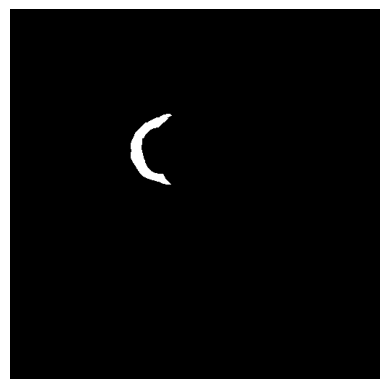

In [ ]:
# смотрим файл-маску nii.gz (файл 3D: 152х152х(75-297))
# -----------------------------------------------------
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив

# смотрим параметры изображения
print(type(img))
# print("  размеры nii.gz:", img.Rows, img.Columns)
# print("  объем памяти:", img.__sizeof__(), "b")
# print("  min-max значения:", img.SmallestImagePixelValue, img.LargestImagePixelValue)
# перевод к numpy массив, вывод
print(type(img_array), img_array.dtype)
print("  размеры nii.gz-массив:", img_array.shape)
print("  объем памяти:", img_array.__sizeof__(), "b;", int(img_array.__sizeof__() / 1000000), "Mb")
print("  min-max значения:", img_array.min(), img_array.max())

# Для отображения изображения в виде картинки можно использовать библиотеку matplotlib:
plt.imshow(img_array[:, :, 50], cmap="gray")                                        # отображение среза изображения по оси Z
plt.axis("off")
plt.show() 

# Для перевода изображения в numpy массив можно использовать метод get_fdata() объекта img:
# data = img.get_fdata()                                                            # получение данных изображения в виде numpy массива

# del img
# del img_array
# gc.collect()

In [ ]:
# смотрим разброс значений в 3D массиве из сегментированного изображения

print(img_array[:, :, 50].shape)
print(img_array[:, :, 50][:2, :10])
#print(img_array[:, :, 50].data)
print(np.unique(img_array))
print(np.unique(img_array, axis=2))

(512, 512)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 1.]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0

In [ ]:
# как работает np.unique по осям 3D-тензора
ax0 = np.unique(img_array, axis=0)
ax1 = np.unique(img_array, axis=1)
ax2 = np.unique(img_array, axis=2)

# как работает unique по осям 2D-тензора (берем конкретный срез)
cc_ax0 = np.unique(img_array[:, :, 50], axis=0)
cc_ax1 = np.unique(img_array[:, :, 50], axis=1)

# смотрим размерности полученных массивов
print(ax0.shape, ax1.shape, ax2.shape)
print(cc_ax0.shape, cc_ax1.shape)

(103, 512, 111) (512, 78, 111) (512, 512, 38)
(64, 512) (512, 54)


In [ ]:
# вариант np.unique - с возвратом счетчиков вхождений
ax2_ext = np.unique(img_array, axis=2, return_counts=True)

print(ax2_ext)

(array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0

In [ ]:
# распечатаем min-max значения по последней оси массива np.unique(по последней оси исходного массива)
for i in range(ax2.shape[2]):
  print(ax2[:, :, i].min(), ax2[:, :, i].max())

0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


In [ ]:
# вариант np.unique - с возвратом индексов уникальных элементов (-> можно восстановить исходный массив)
ax2_ext2, idx_ext2 = np.unique(img_array, axis=2, return_inverse=True )

print(ax2_ext2)
print(idx_ext2)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[ 0  0  0 

In [ ]:
# переводим массив индексов в Boolean
# получаем маску для последней оси исходного 3D-массива - есть/нет выпот на конкретном срезе
print(np.bool8(idx_ext2))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]


In [ ]:
# смотрим параметры трех семгентированных файлов одного пациента (для сравнения)
filename1 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"   # имя файла
filename2 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_second_reviewer.nii.gz"  # имя файла
filename3 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_third_reviewer.nii.gz"   # имя файла

img_array1 =  nib.load(filename1).get_fdata()                                          # перевод в numpy массив
img_array2 =  nib.load(filename2).get_fdata()                                          # перевод в numpy массив
img_array3 =  nib.load(filename3).get_fdata()                                          # перевод в numpy массив

print("Оригинальный снимок имеет 111 срезов")
print("Сегментированные снимки:")
print("  img_array1:", type(img_array1), img_array1.__sizeof__(), img_array1.shape, img_array1.dtype, img_array1.min(), img_array1.max() )
print("  img_array2:", type(img_array2), img_array2.__sizeof__(), img_array2.shape, img_array2.dtype, img_array2.min(), img_array2.max() )
print("  img_array3:", type(img_array3), img_array3.__sizeof__(), img_array3.shape, img_array3.dtype, img_array3.min(), img_array3.max() )

Оригинальный снимак имеет 111 срезов
Сегментированные снимки:
  img_array1: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0
  img_array2: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0
  img_array3: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0


###смотрим исходное изображение dcm

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 2237
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 2237


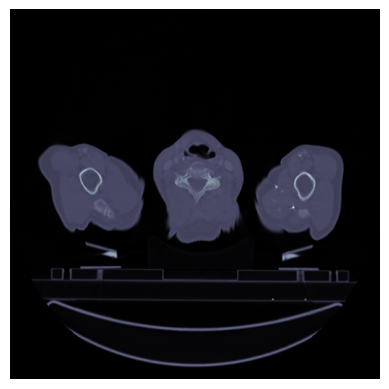

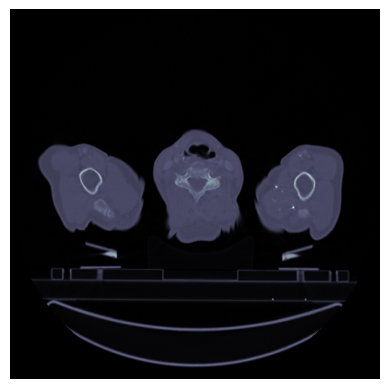

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 1442
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 1442


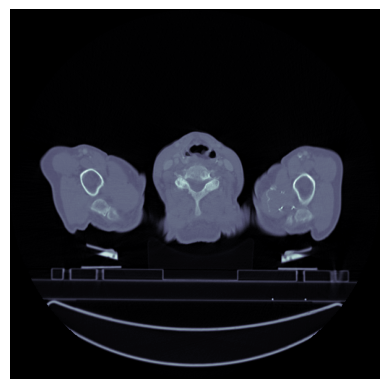

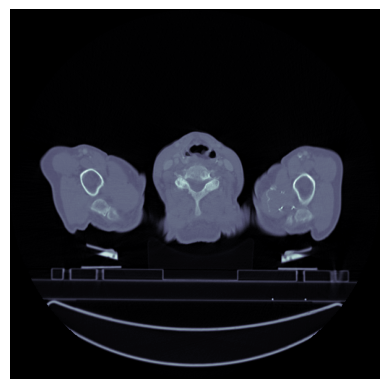

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 1378
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 1378


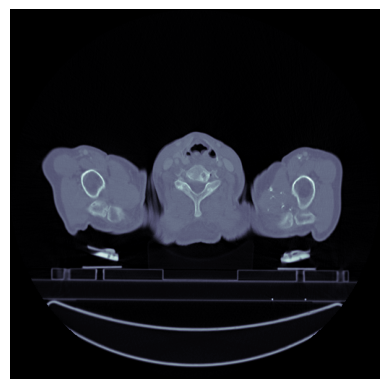

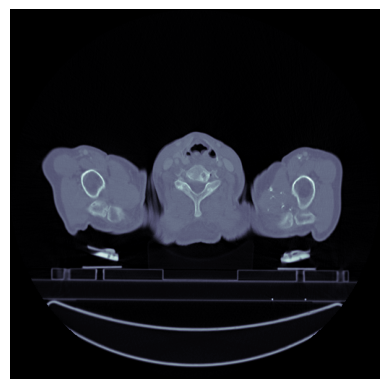

4248

In [ ]:
#смотрим исходное изображение dcm (75-297 файлов 2D: 152х152)
# -----------------------------------------------------------
# type(dcm_file) =             <class 'pydicom.dataset.FileDataset'>
# type(dcm_file.pixel_array) = <class 'numpy.ndarray'>

patient_dir = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228"

for file in sorted(os.listdir(patient_dir))[:3]:
  # загрузить файл dcm
  #dcm_file = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm") 
  dcm_file = dicom.dcmread(os.path.join(patient_dir, file))
  offset = dcm_file.RescaleIntercept
  # смотрим параметры изображения
  print(type(dcm_file))
  print("  размеры dcm:", dcm_file.Rows, dcm_file.Columns)
  print("  объем памяти:", dcm_file.__sizeof__(), "b")
  print("  min-max значения:", dcm_file.SmallestImagePixelValue, dcm_file.LargestImagePixelValue)
  # перевод к numpy массив, вывод
  print(type(dcm_file.pixel_array), dcm_file.pixel_array.dtype)
  print("  размеры dcm-массив:", dcm_file.pixel_array.shape)
  print("  объем памяти:", dcm_file.pixel_array.__sizeof__(), "b")
  print("  min-max значения:", dcm_file.pixel_array.min(), dcm_file.pixel_array.max())

  plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
  plt.axis("off")  
  plt.show()

  plt.imshow((dcm_file.pixel_array - dcm_file.RescaleIntercept), cmap=plt.cm.bone)   # cmap=plt.cm.gray
  plt.axis("off")  
  plt.show()


del dcm_file
gc.collect()

In [ ]:
# смотрим содержимое dcm файла LUNG1-001
dcm_file1 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm") 
print(dcm_file1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.307880158436639081057603825300678127628
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.99.99.3

In [ ]:
# смотрим содержимое dcm файла LUNG1-002
dcm_file2 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm") 
print(dcm_file2)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.146690518896939717990238286069631301037
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20090530'
(0008, 0013) Instance Creation Time              TM: '130247'
(0008, 0014) Instance Creator UID  

In [ ]:
img_array = get_img("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")

print(type(img_array), img_array.dtype)
print("  размеры dcm-массив:", img_array.shape)
print("  объем памяти:", img_array.__sizeof__(), "b")
print("  min-max значения:", img_array.min(), img_array.max())

<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 2237


In [ ]:
# смотрим содержимое dcm файла LUNG1-001
dcm_file1 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm") 
dcm_file2 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm")
dcm_file3 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm") 
print(dcm_file1.SliceThickness)
print(dcm_file2.SliceThickness)
print(dcm_file3.SliceThickness)

###пробуем примеры кода "открыть-вывести" от согруппников

Размерность изображения сегментирование плеврального выпота: высота: 512, ширина: 512, глубина:297
объем памяти: 622854288 b; 622 Mb


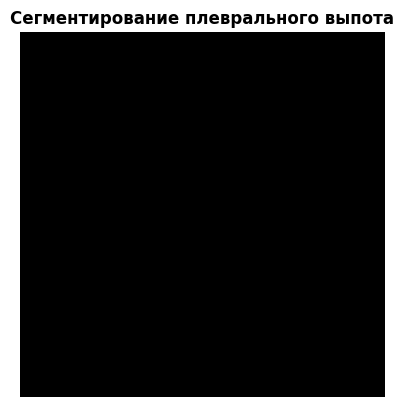

45

In [ ]:
n = 28
# Загрузка масок nii.gz (файл 3D: 152х152х(75-297))
# -------------------------------------------------
#image_path1 = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz"
   #image_path2 = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_second_reviewer.nii.gz"
image_path2 = "/content/Effusions/LUNG1-104/LUNG1-104_effusion_first_reviewer.nii.gz"  # у снимка 297 срезов
#image_obj1 = nib.load(image_path1)
image_obj2 = nib.load(image_path2)
# Конвертирует nii.gz в массив
#image_data1 = image_obj1.get_fdata()
image_data2 = image_obj2.get_fdata()
#rotated_image1 = np.rot90(image_data1)
# Отображает размеры файла
#height1, width1, depth1 = image_data1.shape
height2, width2, depth2 = image_data2.shape
#print(f"Размерность изображения сегментирование грудной клетки:  {height1}, ширина: {width1}, глубина:{depth1}")
print(f"Размерность изображения сегментирование плеврального выпота: высота: {height2}, ширина: {width2}, глубина:{depth2}")
print("объем памяти:", image_data2.__sizeof__(), "b;", int(image_data2.__sizeof__() / 1000000), "Mb")

# # Показывает изображения слоя
plt.figure(1, figsize=(16, 10))

# plt.subplot(1, 3, 1)
# plt.title('Оригинальное изображение', fontweight='bold')
# plt.imshow(ds.pixel_array, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Сегментирование грудной клетки', fontweight='bold')
# plt.imshow(rotated_image1[:, :, n], cmap='gray')
# plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Сегментирование плеврального выпота', fontweight='bold')
plt.imshow(image_data2[:, :, n], cmap='gray')
plt.axis('off')

plt.show()

del image_obj2
del image_data2
gc.collect()

<class 'pydicom.dataset.FileDataset'> <class 'numpy.ndarray'> (512, 512)


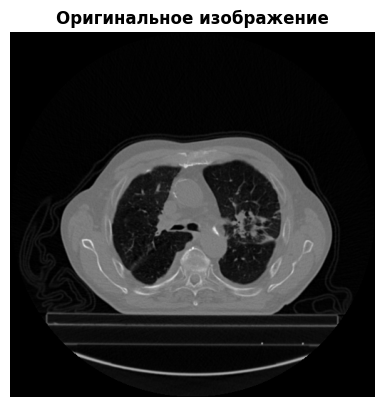

5355

In [ ]:
def get_img_test(image_path):
    rotated_image = None
    if image_path.endswith('.dcm'):
        image_obj = dicom.dcmread(image_path)
        image_np = image_obj.pixel_array
    if image_path.endswith('.gz'):
        image_obj = nib.load(image_path)
        #image_np = image_obj.get_fdata().astype(np.int32)
        #image_np = np.resize(image_obj.get_fdata(), (512,512, min_images))
        image_np = image_obj.get_fdata()
    return image_obj#, image_np


folder = f'/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046'
image_path = os.path.join(f'{folder}/1-050.dcm')
img1 = get_img_test(image_path)
img1_np = img1.pixel_array
print(type(img1), type(img1_np), img1_np.shape)

# img2 = get_img_test(os.path.join(f'{DATA_DIR}/{THOR_CAV_DIR}/LUNG1-001/LUNG1-001_thor_cav_primary_reviewer.nii.gz'))
# img2_np = img2.get_fdata().astype(np.int32)
# print(type(img2), type(img2_np), img2_np.dtype, img2_np.shape)

# img3 = get_img_test(os.path.join(f'/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz'))
# img3_np = img3.get_fdata()
# print(type(img3), type(img3_np), img3_np.dtype, img3_np.shape)

plt.figure(1, figsize=(16, 10))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение', fontweight='bold')
plt.imshow(img1_np, cmap='gray')
plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Сегментирование грудной клетки', fontweight='bold')
# plt.imshow(img2_np[:, :, 50], cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.title('Сегментирование плеврального выпота', fontweight='bold')
# plt.imshow(img3_np[:, :, 50], cmap='gray')
# plt.axis('off')

plt.show()

del img1
del img1_np
gc.collect()

#Готовим списки для генератора батчей

создаем 2 списка пациентов (без выпотов и с выпотами), перемешиваем оба списка, делим на части, получаем списки ID пациентов train/test

In [ ]:
# список пациентов класс1 - из папки с сегментированными изображениями EFFUSIONS_DIR
patients_eff = [ name for name in sorted(os.listdir(EFFUSIONS_DIR)) if os.path.isdir(os.path.join(EFFUSIONS_DIR, name)) ]
# список пациентов класс0 - из папки с оригинальными изображениями ORIGINAL_DIR минус те, кто попал в список patients_eff
patients_noeff = [ name for name in sorted(list(set(os.listdir(ORIGINAL_DIR)) - set(patients_eff))) if os.path.isdir(os.path.join(ORIGINAL_DIR, name)) ]

print("Всего пациентов:", len(patients_noeff) + len(patients_eff))
print("Всего пациентов без выпота:", len(patients_noeff))
print("Всего пациентов с выпотом:", len(patients_eff))
print(patients_noeff)
print(patients_eff)

# перемешиваем каждый список 
np.random.seed(333)
patients_noeff = list(np.random.permutation(patients_noeff))
patients_eff = list(np.random.permutation(patients_eff))

print()
print("Списки после перемешивания:")
print(patients_noeff)
print(patients_eff)

# делим списки пациентов на train/test/valid
# train = с начала до (1-TRAIN_TEST_RATIO*1.5)
patients_train = patients_noeff[ : -int(len(patients_noeff) * TRAIN_TEST_RATIO * 1.5)] + patients_eff[ : -int(len(patients_eff) * TRAIN_TEST_RATIO * 1.5)]
# valid = с (1-TRAIN_TEST_RATIO*1.5) до (1-TRAIN_TEST_RATIO)
patients_valid = patients_noeff[-int(len(patients_noeff) * TRAIN_TEST_RATIO * 1.5) : -int(len(patients_noeff) * TRAIN_TEST_RATIO)] + \
                   patients_eff[-int(len(patients_eff)   * TRAIN_TEST_RATIO * 1.5) : -int(len(patients_eff)   * TRAIN_TEST_RATIO)]
# test = с (1-TRAIN_TEST_RATIO) до конца
patients_test = patients_noeff[-int(len(patients_noeff) * TRAIN_TEST_RATIO) : ] + patients_eff[-int(len(patients_eff) * TRAIN_TEST_RATIO) : ]

print()
print("Списки после разделения:")
print("train:", "всего пациентов", len(patients_train), "\n", patients_train)
print("valid:", "всего пациентов", len(patients_valid), "\n", patients_valid)
print("test: ", "всего пациентов", len(patients_test), "\n", patients_test)

Всего пациентов: 403
Всего пациентов без выпота: 325
Всего пациентов с выпотом: 78
['LUNG1-004', 'LUNG1-006', 'LUNG1-007', 'LUNG1-009', 'LUNG1-010', 'LUNG1-011', 'LUNG1-012', 'LUNG1-015', 'LUNG1-017', 'LUNG1-019', 'LUNG1-020', 'LUNG1-022', 'LUNG1-023', 'LUNG1-025', 'LUNG1-027', 'LUNG1-029', 'LUNG1-030', 'LUNG1-032', 'LUNG1-033', 'LUNG1-034', 'LUNG1-036', 'LUNG1-037', 'LUNG1-039', 'LUNG1-040', 'LUNG1-041', 'LUNG1-043', 'LUNG1-044', 'LUNG1-045', 'LUNG1-047', 'LUNG1-048', 'LUNG1-049', 'LUNG1-052', 'LUNG1-054', 'LUNG1-055', 'LUNG1-056', 'LUNG1-057', 'LUNG1-059', 'LUNG1-062', 'LUNG1-063', 'LUNG1-064', 'LUNG1-066', 'LUNG1-067', 'LUNG1-070', 'LUNG1-071', 'LUNG1-072', 'LUNG1-073', 'LUNG1-075', 'LUNG1-076', 'LUNG1-077', 'LUNG1-078', 'LUNG1-079', 'LUNG1-080', 'LUNG1-081', 'LUNG1-082', 'LUNG1-084', 'LUNG1-086', 'LUNG1-087', 'LUNG1-089', 'LUNG1-090', 'LUNG1-092', 'LUNG1-094', 'LUNG1-096', 'LUNG1-098', 'LUNG1-099', 'LUNG1-100', 'LUNG1-101', 'LUNG1-102', 'LUNG1-103', 'LUNG1-105', 'LUNG1-106', 'LUNG1

In [ ]:
# перемешиваем каждый список train/valid/test
np.random.seed(666)
patients_train = list(np.random.permutation(patients_train))
patients_valid = list(np.random.permutation(patients_valid))
patients_test =  list(np.random.permutation(patients_test))

создаем по каждому списку train/valid/test списки батчей train/valid/test

In [ ]:
# соберем списки из батчей ID пациентов для train/valid/test
size_step = BATCH_SIZE   # 10 пока без перекрытия пациентов

patients_batches_train = patients_batches(patients_train, BATCH_SIZE, size_step)
patients_batches_valid = patients_batches(patients_valid, BATCH_SIZE, size_step)
patients_batches_test = patients_batches(patients_test, BATCH_SIZE, size_step)

print("Всего батчей:", len(patients_batches_train) + len(patients_batches_valid) + len(patients_batches_test))
print("  train:", len(patients_batches_train))
print("  valid:", len(patients_batches_valid))
print("  test: ", len(patients_batches_test))

Всего батчей: 403
  train: 283
  valid: 40
  test:  80


#Создаем 3D модель, обучаем, смотрим графики

In [ ]:
# создаем модель
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, 1)  # (128, 128, 128, 1)  # (512, 512, 111, 1)

model = unet_3d(input_shape, CLASS_COUNT)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                04, 1)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 512, 512, 30  1792        ['input_1[0][0]']                
                                4, 64)                                                            
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 30  256        ['conv3d[0][0]']                 
 alization)                     4, 64)                                                        

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi = 60)

In [ ]:
# компилируем модель
LEARNING_RATE = 1e-3

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss=dice_coef_loss,
              metrics=[tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.9, name='binary_io_u')])

# loss_fn = lss.BinaryCrossentropy()                   # lss.SparseCategoricalCrossentropy()     lss.CategoricalCrossentropy() 
# opt_fn = opt.Adam(learning_rate=LEARNING_RATE)
# metr_fn = mtr.BinaryAccuracy()                       # mtr.SparseCategoricalAccuracy()         mtr.CategoricalAccuracy()
# model.compile(loss=loss_fn, optimizer=opt_fn, metrics=[metr_fn])

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),       # Оптимизатор Adam c заданным ранее шагом обучения
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
#               metrics=['accuracy'])                                                  # Метрика Accuracy

In [ ]:
# #checkpoints = ModelCheckpoint(f"/content/drive/MyDrive/CARS-ULTRAPRO/model_cars_weights.h5", 
# checkpoints = ModelCheckpoint(f"/content/drive/MyDrive/CARS-ULTRAPRO", 
#                               monitor="val_categorical_accuracy",
#                               save_weights_only=False, 
#                               mode="max",
#                               save_best_only=True)

In [ ]:
# число батчей = 10 -> 2.28Г размер батча 
train_step_data = batch_generator(0, patients_batches_train, patients_eff)         

In [ ]:
print(train_step_data[0][0].shape, train_step_data[1][0].shape)
print(train_step_data[0][0].min(), train_step_data[0][0].max(), train_step_data[1][0].min(), train_step_data[1][0].max())
print(np.unique(train_step_data[0][0]), np.unique(train_step_data[1][0]))
print(train_step_data[0][0].dtype, train_step_data[1][0].dtype)
print(sys.getsizeof(train_step_data[0]), "байт",sys.getsizeof(train_step_data[1]), "байт", 
      (sys.getsizeof(train_step_data[0])+sys.getsizeof(train_step_data[1]))/1024/1024, "Мб" )

(512, 512, 304, 1) (512, 512, 304, 1)
0.0 1.0 0 0
[0.000e+00 2.444e-04 4.888e-04 ... 9.990e-01 9.995e-01 1.000e+00] [0]
float16 uint8
1593835696 байт 796917936 байт 2280.0003356933594 Мб


In [ ]:
# число батчей = 10 -> почти сразу вылетает по памяти
result_train_step = model.train_on_batch(train_step_data[0], train_step_data[1])   

In [ ]:
# число батчей = 1 -> 228М размер батча
train_step_data = batch_generator(0, patients_batches_train, patients_eff)         

In [ ]:
print(train_step_data[0][0].shape, train_step_data[1][0].shape)
print(train_step_data[0][0].min(), train_step_data[0][0].max(), train_step_data[1][0].min(), train_step_data[1][0].max())
print(np.unique(train_step_data[0][0]), np.unique(train_step_data[1][0]))
print(train_step_data[0][0].dtype, train_step_data[1][0].dtype)
print(sys.getsizeof(train_step_data[0]), "байт",sys.getsizeof(train_step_data[1]), "байт", 
      (sys.getsizeof(train_step_data[0])+sys.getsizeof(train_step_data[1]))/1024/1024, "Мб" )

(512, 512, 304, 1) (512, 512, 304, 1)
0.0 1.0 0 0
[0.000e+00 2.444e-04 4.888e-04 ... 9.990e-01 9.995e-01 1.000e+00] [0]
float16 uint8
159383728 байт 79691952 байт 228.00033569335938 Мб


In [ ]:
# число батчей = 1 -> вылетает по памяти
result_train_step = model.train_on_batch(train_step_data[0], train_step_data[1])    

In [ ]:
train_step_data = batch_generator(0, patients_batches_train, patients_eff)

1 -2000 0 4094 1 -1024 [40, -600] [400, 1200]
2 -2000 0 4022 1 -1024 [40, -600] [400, 1200]
3 -2000 0 4010 1 -1024 [40, -600] [400, 1200]
4 -2000 0 4036 1 -1024 [40, -600] [400, 1200]
5 -2000 0 2488 1 -1024 [40, -600] [400, 1200]
6 -2000 0 2345 1 -1024 [40, -600] [400, 1200]
7 -2000 0 2365 1 -1024 [40, -600] [400, 1200]
8 -2000 0 2307 1 -1024 [40, -600] [400, 1200]
9 -2000 0 2260 1 -1024 [40, -600] [400, 1200]
10 -2000 0 2364 1 -1024 [40, -600] [400, 1200]
11 -2000 0 2366 1 -1024 [40, -600] [400, 1200]
12 -2000 0 2360 1 -1024 [40, -600] [400, 1200]
13 -2000 0 2383 1 -1024 [40, -600] [400, 1200]
14 -2000 0 2326 1 -1024 [40, -600] [400, 1200]
15 -2000 0 2369 1 -1024 [40, -600] [400, 1200]
16 -2000 0 2340 1 -1024 [40, -600] [400, 1200]
17 -2000 0 2325 1 -1024 [40, -600] [400, 1200]
18 -2000 0 2324 1 -1024 [40, -600] [400, 1200]
19 -2000 0 2278 1 -1024 [40, -600] [400, 1200]
20 -2000 0 2373 1 -1024 [40, -600] [400, 1200]
21 -2000 0 2466 1 -1024 [40, -600] [400, 1200]
22 -2000 0 2358 1 -102

In [ ]:
print(train_step_data[0][0].shape)
print(train_step_data[0][0].min(), train_step_data[0][0].max())
print(np.unique(train_step_data[0][0]))
print(train_step_data[0][0].dtype)

(512, 512, 304, 1)
0.0 1.0
[0.000e+00 2.444e-04 4.888e-04 ... 9.990e-01 9.995e-01 1.000e+00]
float16


In [ ]:
# обучаем модель (код из учебного ноутбука по собственному генератору)

CurrentTime = time.time()                                                   # Засекаем время для измерения времени обучения нейронной сети

# создаем пустые списки для сбора усредненных данных от шагов в конце эпохи
loss_train_lrn =[]
acc_train_lrn =[]
loss_valid_lrn =[]
acc_valid_lrn =[]

# определяем количество шагов на 
steps_train = len(patients_batches_train)
steps_valid = len(patients_batches_valid)
#steps_test = len(set_batches_test[0])

for epoch in range(EPOCHS):                                                 # запускаем цикл обучения по эпохам
    gc.collect() 

    int_start = time.time()                                                 # записываем начальное время эпохи
    
    # создаем пустые списки для сбора данных по шагам внутри эпохи
    loss_train = []    
    acc_train = []
    loss_valid = []
    acc_valid = []

    print('Эпоха', epoch , '/', EPOCHS)                                     # Выводим текущую эпоху и общее число эпох

    # запускаем цикл обучения по шагам внутри эпохи
    for step in range(steps_train):                                         # получаем батч данных для обучения
      gc.collect() 
      
      # получаем step-ый батч данных - (исход.массивы, сегмент.массивы)
      train_step_data = batch_generator(step, patients_batches_train, patients_eff)
      gc.collect()
      # пропускаем обучающий батч данных, получаем ошибку и точность как список
      result_train_step = model.train_on_batch(train_step_data[0], train_step_data[1])
      
      loss_train.append(result_train_step[0])                               # собираем ошибку на шаге
      acc_train.append(result_train_step[1])                                # собираем точность на шаге

      # Задаем параметры в словаре, которые будем выводить 
      params = {'Время(сек.) на эпохе: ': round(time.time() - int_start,2), # Считаем время обучения на данной эпохе и добавляем в словарь
                'loss: ': round(result_train_step[0], 4),                   # добавляем в словарь ошибку на шаге обучения
                'acc: ': round(result_train_step[1], 4)}                    # Добавляем точность на шаге обучения

      # печатаем отдельной функцией текущие данные на шаге обучения
      print_log(step, steps_train, params)                                  # Выводим всю нужную информацию 
      # запоминаем последний шаг обучения на эпохе и добавляем единицу для корректности отображения
      endstep = step + 1 
    
    # собираем усредненные ошибку и точность на обучении от всех шагов на эпохе
    loss_train_lrn.append(np.mean(loss_train))
    acc_train_lrn.append(np.mean(acc_train))

    # запоминаем и округляем последнее записанное усредненное значение для отображения по ходу обучения
    params['loss: '] =  round(loss_train_lrn[-1],4)                         # перезаписываем в словаре для ошибки на обучении
    params['acc: '] =  round(acc_train_lrn[-1],4)                           # перезаписываем в словаре для точности на обучении
    
    # оцениваем модели на проверочной базе
    for step in range(steps_valid):
      gc.collect() 
      
      # получаем батч данных для проверки
      valid_step_data = batch_generator(step, patients_batches_valid, patients_eff)
      # пропускаем проверочный батч данных через функцию оценки модели, получаем ошибку и точность как список
      result_valid_step = model.evaluate(valid_step_data[0], valid_step_data[1], verbose=0)
      # собираем ошибку на шаге
      loss_valid.append(result_valid_step[0])
      # собираем точность на шаге
      acc_valid.append(result_valid_step[1])

    # собираем усредненные ошибку и точность на проверке от всех шагов на эпохе
    loss_valid_lrn.append(np.mean(loss_valid))
    acc_valid_lrn.append(np.mean(acc_valid))
    
    # запоминаем и округляем последнее записанное значение для отображения по ходу обучения
    valid_parm = {'val_loss: ': round(loss_valid_lrn[-1],4),                # добавляем в словарь  
                  'val_acc: ': round(acc_valid_lrn[-1],4)}                  # Добавляем точность в словарь
    # добавляем в обший словарь параметров по эпохе словарь с оценкой модели
    params.update(valid_parm)
    # печатаем отдельной функцией усредненные данные в конце текущей эпохи обучения
    print_log(endstep, steps_train, params)                                 # Выводим всю нужную информацию 
        
    # Вручную переносим каретку на следующую строку,
    # чтобы не стирать финальные значения сети на эпохе
    print()


history_lrn = {"binary_io_u": acc_train_lrn, 
               "loss": loss_train_lrn, 
               "val_binary_io_u": acc_valid_lrn, 
               "val_loss": loss_valid_lrn
              }

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))
print()
print("Максимальная точность на тестовой выборке:", max(history_lrn["val_binary_io_u"]))

Эпоха 0 / 10


In [ ]:
# смотрим графики обучения
plot_show(["binary_io_u", "loss"],  ["Коэффициент пересечения и объединения", "Ошибка"], history_lrn)

##смотрим срезы исходных изображений (dcm-файлы) и из tiff  файлов



смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff (сохранялись **не предобработанные** пиксели!!!)


У пациента есть выпот, смотрим срезы с выпотом
Параметры изображения из файла: 
  тип <class 'nibabel.nifti1.Nifti1Image'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> uint8
  размеры             (512, 512, 111)
  объем памяти        29098128 b;
  min-max значения    0 1
  уникальные значения [0 1]


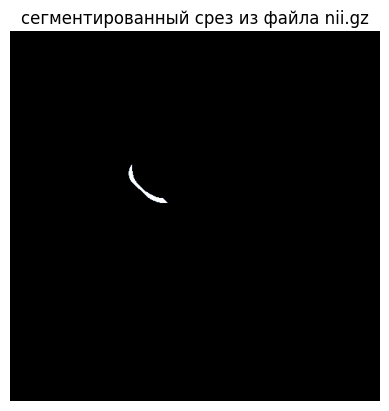

Параметры изображения из файла: 
  тип <class 'pydicom.dataset.FileDataset'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        128 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


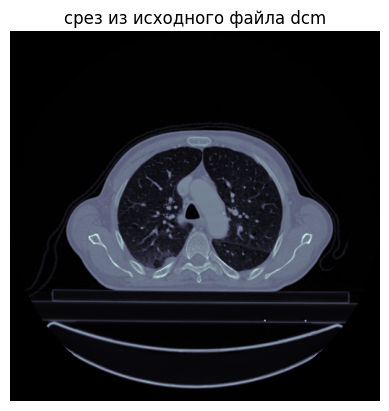

Параметры изображения из файла: 
  тип <class 'tifffile.tifffile.TiffPage'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


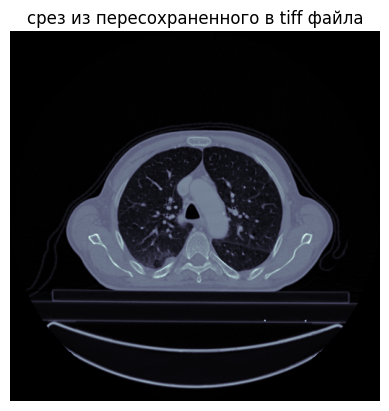

In [ ]:
# 1 ЕСТЬ ВЫПОТ на срезе
print("У пациента есть выпот, смотрим срезы с выпотом")
#plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
show_image(filename, nslice, "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
show_image(filename, nslice, "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
show_image(filename, nslice, "срез из пересохраненного в tiff файла")

In [ ]:
# 2 НЕТ ВЫПОТА на срезе
print("У пациента есть выпот, смотрим срезы без выпота")
plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 0
show_image(filename, nslice, (1, 3, 1), "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm"
show_image(filename, nslice, (1, 3, 2), "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
show_image(filename, nslice, (1, 3, 3), "срез из пересохраненного в tiff файла")

смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff (сохранялись **предобработанные** пиксели!!!)

У пациента есть выпот, смотрим срезы с выпотом
Параметры изображения из файла: 
  тип <class 'nibabel.nifti1.Nifti1Image'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> uint8
  размеры             (512, 512, 111)
  объем памяти        29098128 b;
  min-max значения    0 1
  уникальные значения [0 1]


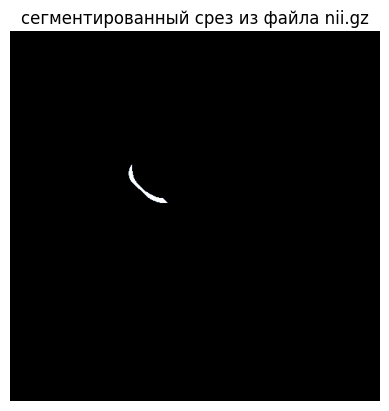

Параметры изображения из файла: 
  тип <class 'pydicom.dataset.FileDataset'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


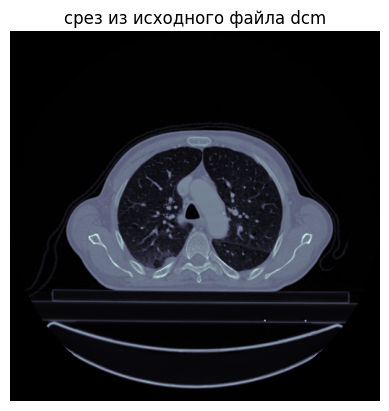

Параметры изображения из файла: 
  тип <class 'tifffile.tifffile.TiffPage'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


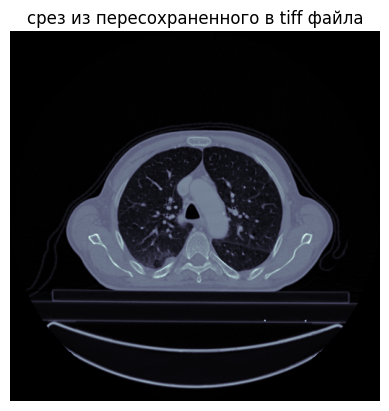

In [ ]:
# 1 ЕСТЬ ВЫПОТ на срезе
print("У пациента есть выпот, смотрим срезы с выпотом")
#plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
show_image(filename, nslice, "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
show_image(filename, nslice, "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002-{nslice + 1:03d}(1-{nslice + 1:03d}.dcm).tiff"
show_image(filename, nslice, "срез из пересохраненного в tiff файла")

In [ ]:
# 2 НЕТ ВЫПОТА на срезе
print("У пациента есть выпот, смотрим срезы без выпота")
plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 0
show_image(filename, nslice, (1, 3, 1), "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm"
show_image(filename, nslice, (1, 3, 2), "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002-{nslice + 1:03d}(1-{nslice + 1:03d}.dcm).tiff"
show_image(filename, nslice, (1, 3, 3), "срез из пересохраненного в tiff файла")

смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff

сегментированный срез 42 из первого файла nii.gz
пиксели в срезе: 0.0 1.0


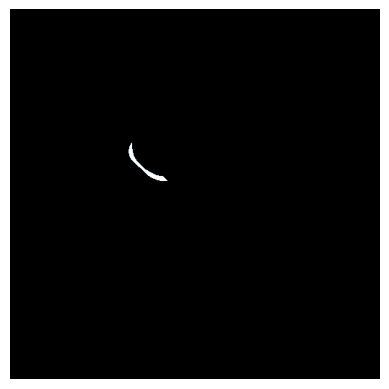

/content/train/class_effusions/LUNG1-002(1-042.dcm)042.tiff
262144 (512, 512)
пиксели в img_array_tiff: -1024 1248
Пересохраненный в формате tiff файл 1-042.dcm


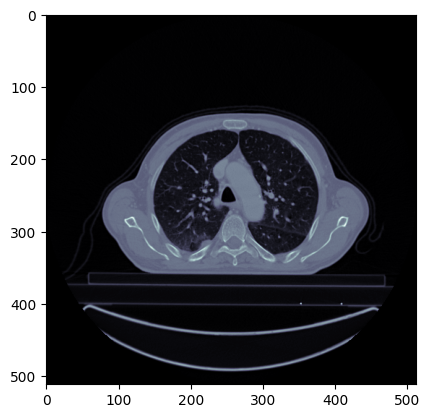

/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm
262144 (512, 512)
пиксели в dcm_file_array: -1024 1248
оригинальный файл 1-042.dcm; номер среза по сортировке = 42


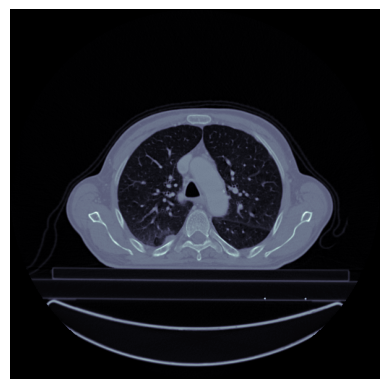

In [ ]:
# проверим, что срезы друг другу соответствуют

# 1 ЕСТЬ ВЫПОТ
# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив
print(f"сегментированный срез {nslice + 1} из первого файла nii.gz")
print("пиксели в срезе:", img_array[:, :, nslice].min(), img_array[:, :, nslice].max())
plt.imshow(img_array[:, :, nslice], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
plt.axis("off")
#plt.title(f"сегментированный срез {nslice + 1} из первого файла nii.gz") # , fontweight='bold')
plt.show() 

# открываем tiff-файл (--- было: png-файл)
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
# img_png = Image.open(filename)
# img_array_png = np.array(img_png)
img_array_tiff = tifffile.imread(filename).astype(np.int16)
print(filename)
print(img_array_tiff.size, img_array_tiff.shape)
print("пиксели в img_array_tiff:", img_array_tiff.min(), img_array_tiff.max())
print(f"Пересохраненный в формате tiff файл 1-{nslice + 1:03d}.dcm")
#img.show()
plt.imshow(img_array_tiff, cmap=plt.cm.bone)
plt.show() 

# открываем оригинальный файл .dcm
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
dcm_file = dicom.dcmread(filename)
dcm_file_array = dcm_file.pixel_array
print(filename)
print(dcm_file_array.size, dcm_file_array.shape)
print("пиксели в dcm_file_array:", dcm_file_array.min(), dcm_file_array.max())
print(f"оригинальный файл 1-{nslice + 1:03d}.dcm; номер среза по сортировке = {nslice + 1}")
plt.imshow(dcm_file_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
plt.axis("off")  
#plt.title(f"оригинальный файл 1-{nslice + 1:03d}.dcm; номер среза по сортировке = {nslice + 1}") # , fontweight='bold')
plt.show()

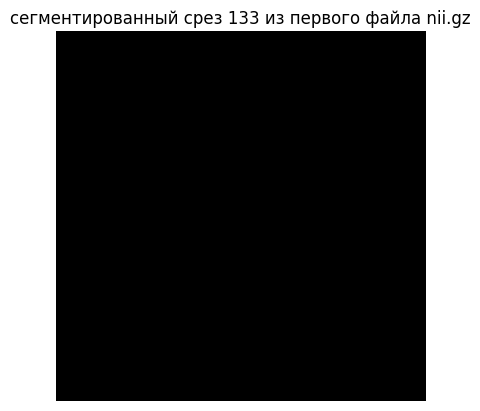

(512, 512)
Пересохраненный в формате png файл 1-001.dcm


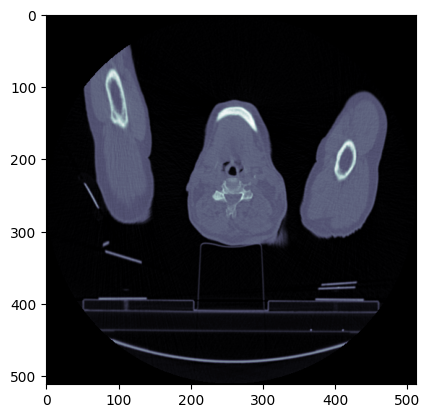

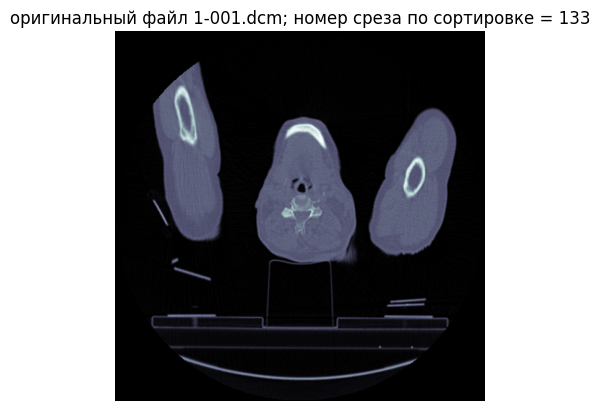

In [ ]:
# проверим, что срезы друг другу соответствуют

# 2 НЕТ ВЫПОТА
# открываем срез сегментов 107 в nii.gz (/content/train/class_noeffusions/LUNG1-001(1-001.dcm)133.png  - картинка без выпота)
filename = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz"  # имя файла
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив
plt.imshow(img_array[:, :, 1], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
plt.axis("off")
plt.title("сегментированный срез 133 из первого файла nii.gz") # , fontweight='bold')
plt.show() 

# открываем tiff-файл (--- было: png-файл) 1-027
filename = "/content/train/class_noeffusions/LUNG1-001(1-001.dcm)133.tiff"
# img_png = Image.open(filename)
# img_array_png = np.array(img_png)
img_array_tiff = tifffile.imread(filename).astype(np.int16)
print(img_array_tiff.size)
print("Пересохраненный в формате tiff файл 1-001.dcm")
#img.show()
plt.imshow(img_array_tiff, cmap=plt.cm.bone)
plt.show() 

# открываем оригинальны файл 1-001.dcm
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm"
dcm_file = dicom.dcmread(filename)
plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
plt.axis("off")  
plt.title("оригинальный файл 1-001.dcm; номер среза по сортировке = 133") # , fontweight='bold')
plt.show()

In [ ]:
print("значения в массиве nii.gz", img_array[:, :, 107].min(), img_array[:, :, 107].max())
print("значения в массиве tiff", img_array_tiff.min(), img_array_tiff.max())
print("значения в массиве dcm", dcm_file.pixel_array.min(), dcm_file.pixel_array.max())


значения в массиве nii.gz 0.0 0.0
значения в массиве png 0 2535
значения в массиве dcm 0 2535


#Песочница

In [ ]:
#@title пример использование утилиты "tf.keras.utils.image_dataset_from_directory" и tf.data.Dataset
# https://www.tensorflow.org/tutorials/load_data/images
# https://www.tensorflow.org/tutorials/images/classification

# ------------------------------------------------------------------------------
# 1 используем tf.keras.utils.image_dataset_from_directory для создания датасета
# создать обучающий датасет
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# создать проверочный датасет
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# имена классов
class_names = train_ds.class_names
print(class_names)
# вывести первые 9 картинок первого батча в датасете
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("int16"), cmap=plt.cm.bone)
    plt.title(class_names[labels[i]])
    plt.axis("off")
# датасет можно перебирать в цикле
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break   
# нормализация
# используем слой tf.keras.layers.Rescaling
# to scale pixel values to [-1,1] you can instead write tf.keras.layers.Rescaling(1./127.5, offset=-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
# вариант 1
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# проверяем значения пикселей: Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
# вариант 2 - вставить слой нормализации в модель

# нужно обязательно добавлять, чтобы что-то там улучшить
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# собираем модель
num_classes = 5
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
# обучаем модель
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)
# ------------------------------------------------------------------------------
# 2 используем tf.data.Dataset для осздания датасета
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
for f in list_ds.take(5):
  print(f.numpy())
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)
# создаем датасеты
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)
# длина датасетов
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())
# функции 
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width]) 
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
# вывести первые 9 картинок первого батча в датасете
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

In [ ]:
#@title скрипт по конвертации dcm файлов в изображения .png
# запуск: python script.py input_data output_data

import os
import argparse
import logging
from glob import glob

import numpy as np
from tqdm import tqdm
from PIL import Image
from pydicom import dcmread
from pydicom.pixel_data_handlers.util import convert_color_space


# Script configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
parser = argparse.ArgumentParser(description='The script is used to convert some kinds of DICOM (.dcm) files to regular image files (.png)')
parser.add_argument('input', type=str, help='A root directory with medical data files in DICOM format. The script finds all these files based on their extension')
parser.add_argument('output', type=str, help='Where to save converted files. The script repeats internal directories structure of the input root directory')
args = parser.parse_args()


class Converter:
    def __init__(self, filename):
        with dcmread(filename) as ds:
            self._pixel_array = ds.pixel_array
            self._photometric_interpretation = ds.PhotometricInterpretation
            self._min_value = ds.pixel_array.min()
            self._max_value = ds.pixel_array.max()
            self._depth = ds.BitsStored

            logging.debug('File: {}'.format(filename))
            logging.debug('Photometric interpretation: {}'.format(self._photometric_interpretation))
            logging.debug('Min value: {}'.format(self._min_value))
            logging.debug('Max value: {}'.format(self._max_value))
            logging.debug('Depth: {}'.format(self._depth))

            try:
                self._length = ds["NumberOfFrames"].value
            except KeyError:
                self._length = 1

    def __len__(self):
        return self._length

    def __iter__(self):
        if self._length == 1:
            self._pixel_array = np.expand_dims(self._pixel_array, axis=0)

        for pixel_array in self._pixel_array:
            # Normalization to an output range 0..255, 0..65535
            pixel_array = pixel_array - self._min_value
            pixel_array = pixel_array.astype(int) * (2 ** self._depth - 1)
            pixel_array = pixel_array // (self._max_value - self._min_value)

            # In some cases we need to convert colors additionally
            if 'YBR' in self._photometric_interpretation:
                 pixel_array = convert_color_space(pixel_array, self._photometric_interpretation, 'RGB')

            if self._depth == 8:
                image = Image.fromarray(pixel_array.astype(np.uint8))
            elif self._depth == 16:
                image = Image.fromarray(pixel_array.astype(np.uint16))
            else:
                raise Exception('Not supported depth {}'.format(self._depth))

            yield image


def main(root_dir, output_root_dir):
    dicom_files = glob(os.path.join(root_dir, '**', '*.dcm'), recursive = True)
    if not len(dicom_files):
        logging.info('DICOM files are not found under the specified path')
    else:
        logging.info('Number of found DICOM files: ' + str(len(dicom_files)))

    pbar = tqdm(dicom_files)
    for input_filename in pbar:
        pbar.set_description('Conversion: ' + input_filename)
        input_basename = os.path.basename(input_filename)

        output_subpath = os.path.relpath(os.path.dirname(input_filename), root_dir)
        output_path = os.path.join(output_root_dir, output_subpath)
        output_basename = '{}.png'.format(os.path.splitext(input_basename)[0])
        output_filename = os.path.join(output_path, output_basename)

        if not os.path.exists(output_path):
            os.makedirs(output_path)

        try:
            iterated_converter = Converter(input_filename)
            length = len(iterated_converter)
            for i, image in enumerate(iterated_converter):
                if length == 1:
                    image.save(output_filename)
                else:
                    filename_index = str(i).zfill(len(str(length)))
                    list_output_filename = '{}_{}.png'.format(os.path.splitext(output_filename)[0], filename_index)
                    image.save(list_output_filename)
        except Exception as ex:
            logging.error('Error while processing ' + input_filename)
            logging.error(ex)

if __name__ == '__main__':
    input_root_path = os.path.abspath(args.input.rstrip(os.sep))
    output_root_path = os.path.abspath(args.output.rstrip(os.sep))

    logging.info('From: {}'.format(input_root_path))
    logging.info('To: {}'.format(output_root_path))
    main(input_root_path, output_root_path)

##примеры из туториала

https://pydicom.github.io/pydicom/stable/tutorials/dataset_basics.html

чтение файла dcm, содержание датасета

In [ ]:
# версия
print(dicom.__version__)

# путь к тестовому датасету dicom
fpath = dicom.data.get_testdata_file("CT_small.dcm")    # версия pydicom > 1.4
#fpath = get_testdata_files("CT_small.dcm")[0]          #                < 1.4

# читаем датасет
#ds = dicom.dcmread(fpath)
#ds = dcmread(fpath, force=True)                         # если файл не содержит правильных мета-данных, но содержит DICOM data
with open(fpath, 'rb') as f:
  ds = dicom.dcmread(f)

print(type(ds))                                         # <class 'pydicom.dataset.FileDataset'>

2.3.1
<class 'pydicom.dataset.FileDataset'>


In [ ]:
print(type(ds.SliceLocation))

<class 'pydicom.valuerep.DSfloat'>


In [ ]:
print([ds.SliceLocation])

['-77.2040634155']


In [ ]:
A = (1,2)
A = A + (ds.SliceLocation, )
print(A)
print(type(A[-1]))

(1, 2, '-77.2040634155')
<class 'pydicom.valuerep.DSfloat'>


In [ ]:
# просмотр всего датасета:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

In [ ]:
# доступ к отдельным элементам датасета:
# 1 - через теги: (группа, элемент в группе)
# 2 - через keyword: обычно = имя элемента без пробелов
# (0008, 0016) SOP Class UID                       UI: CT Image Storage
elem = ds[0x0008, 0x0016]
print(elem)
print(elem.keyword)

elem = ds['SOPClassUID']
print(elem)

# значение элемента (элементы могут быть многозначными)
print(elem.value)
print(ds.SOPClassUID)                   # только для стандартных элементов
# многозначный элемент
print(ds.ImageType, ds.ImageType[1])
print(ds['ImageType'].VM)               # количество значений у элемента
# элемент - последовательность (дерево) = список ('pydicom.sequence.Sequence') из 0 или больше 'pydicom.dataset.Dataset' объектов
print(ds[0x0010, 0x1002])
print(ds['OtherPatientIDsSequence'])
print(len(ds.OtherPatientIDsSequence), type(ds.OtherPatientIDsSequence), type(ds.OtherPatientIDsSequence[0]))
print(ds.OtherPatientIDsSequence[0])
print(ds.OtherPatientIDsSequence[1])

(0008, 0016) SOP Class UID                       UI: CT Image Storage
SOPClassUID
(0008, 0016) SOP Class UID                       UI: CT Image Storage
1.2.840.10008.5.1.4.1.1.2
1.2.840.10008.5.1.4.1.1.2
['ORIGINAL', 'PRIMARY', 'AXIAL'] PRIMARY
3
(0010, 1002) Other Patient IDs Sequence          SQ: <Sequence, length 2>
(0010, 1002) Other Patient IDs Sequence          SQ: <Sequence, length 2>
2 <class 'pydicom.sequence.Sequence'> <class 'pydicom.dataset.Dataset'>
(0010, 0020) Patient ID                          LO: 'ABCD1234'
(0010, 0022) Type of Patient ID                  CS: 'TEXT'
(0010, 0020) Patient ID                          LO: '1234ABCD'
(0010, 0022) Type of Patient ID                  CS: 'TEXT'


In [ ]:
# формат файла DICOM File Format:
# заголовок = 128 byte preamble + 4 byte DICM prefix + required DICOM File Meta Information elements (элементы из группы 0x0002)
print(ds.preamble)
print()
#print(ds.prefix)
print(ds.file_meta)
print()
# самый важный элемент мета-данных заголовка: (0002,0010) Transfer Syntax UID
# определяет кодировку всего датасета, включая пиксельные данные
print(ds.file_meta.TransferSyntaxUID)
print(ds.file_meta.TransferSyntaxUID.name)

b'II*\x00T\x18\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH

In [ ]:
# изменение элементов датасета
elem = ds[0x0010, 0x0010]
print(elem)
elem.value = 'Citizen^Jan'                      # 
# предпочтительнее для стандартных элементов:
ds.PatientName = 'Citizen^Snips' 
# ds.PatientName = None
print(elem)

# многозначные элементы
ds.ImageType = ['ORIGINAL', 'PRIMARY', 'LOCALIZER']
ds.ImageType[1] = 'DERIVED'
ds.ImageType.insert(1, 'PRIMARY')
print(ds.ImageType)

(0010, 0010) Patient's Name                      PN: 'Citizen^Jan'
(0010, 0010) Patient's Name                      PN: 'Citizen^Snips'
['ORIGINAL', 'PRIMARY', 'DERIVED', 'LOCALIZER']


In [ ]:
# сохранить датасет
ds.save_as('out.dcm')

with open('out.dcm', 'wb') as outfile:
  ds.save_as(outfile)

from io import BytesIO
out = BytesIO()
ds.save_as(out)

# для уверенности, что файл запишется в формате DICOM File Format: будет корректно добавлен/изменен загловок
ds.save_as('out.dcm', write_like_original=False)   

сжатие пиксельных данных в датасете

https://pydicom.github.io/pydicom/stable/tutorials/pixel_data/compressing.html

In [ ]:
# датасет с кодировкой "Explicit VR Little Endian" содержит НЕ сжатые пиксельные данные
# каждая кодировка датасета (Transfer Syntax) имет свои требования к инструменту сжатия пиксельных данных
# рекомендуется использовать "GDCM" for Pixel Data compression (поддерживает все кодировки)

# сжатие сторонними библиотеками, добавление в датасет с помощью pydicom
# ----------------------------------------------------------------------
'''
from typing import List, Tuple

from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.encaps import encapsulate, encapsulate_extended
from pydicom.uid import JPEG2000Lossless

path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)

# Use third-party package to compress
# Let's assume it compresses to JPEG 2000 (lossless)
frames: List[bytes] = third_party_compression_func(...)

# Set the *Transfer Syntax UID* appropriately
ds.file_meta.TransferSyntaxUID = JPEG2000Lossless
# For *Samples per Pixel* 1 the *Photometric Interpretation* is unchanged

# Basic encapsulation
ds.PixelData = encapsulate(frames)
ds.save_as("CT_small_compressed_basic.dcm")

# Extended encapsulation
result: Tuple[bytes, bytes, bytes] = encapsulate_extended(frames)
ds.PixelData = result[0]
ds.ExtendedOffsetTable = result[1]
ds.ExtendedOffsetTableLength = result[2]
ds.save_as("CT_small_compressed_ext.dcm")
'''

# сжатие с помощью pydicom (только кодировка "RLE Lossless")
# будут сжаты имеющиеся в датасете пиксельные данные и изменена кодировка (элемент "Transfer Syntax UID") перед сохранением датасета в файл
'''
from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.uid import RLELossless
path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)
ds.compress(RLELossless)
ds.save_as("CT_small_rle.dcm")
'''

# в качесте Pixel Data можно передать в датасет numpy массив 
# массив должен соответствовать мета-данным датасета: Rows, Columns, Samples per Pixel и тд
'''
import numpy as np
arr = np.zeros((ds.Rows, ds.Columns), dtype='<i2')       # np.int16 - 2 байта = 16 бит
ds.compress(RLELossless, arr)
ds.compress(RLELossless, encoding_plugin='pylibjpeg')    # 
'''

пример открыть и вывести картинку

https://pydicom.github.io/pydicom/stable/auto_examples/input_output/plot_read_dicom.html#sphx-glr-download-auto-examples-input-output-plot-read-dicom-py

In [ ]:
# пример открыть и показать файл
'''
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()
'''

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

пример считывания срезов, правильная сортировка, формирование 3D картинки, вывод как картинки

https://pydicom.github.io/pydicom/stable/auto_examples/image_processing/reslice.html#sphx-glr-auto-examples-image-processing-reslice-py

In [ ]:
# loading multiple files, sorting them by slice location, building a 3D image and reslicing it in different planes
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files = []
# sys.argv - список аргументов командной строки, переданных в скрипт Python при его запуске
# sys.argv[0] - обычно имя самого скрипта, остальные - аргументы
# если запуск из командной строки = "python myscript.py arg1 arg2", то sys.argv будет равен ['myscript.py', 'arg1', 'arg2'].
print('glob: {}'.format(sys.argv[1]))                    
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

In [ ]:
# пробуем цикл с помощью glob
# ---------------------------
# import pydicom as dicom                     # для файлов dcm
# import glob                                 # позволяет получать список файлов, соответствующих заданному шаблону имени или расширению

files = []
i = 0
print('glob: {}'.format(ORIGINAL_DIR))  
# производит реурсивный обход по всем вложенным папкам указанной директории                  
for fname in sorted(glob.glob(ORIGINAL_DIR + "/**/*.dcm", recursive=True)):
    #print("loading: {}".format(fname))
    #files.append(dicom.dcmread(fname))
    files.append(fname)
    i += 1
    if i > 100:
      break
print(files)

# #i = 0
# # цикл по словарю с путями к файлам: каждый файл с исходным изображением добавляем в список, добавляем соответствующую метку
# for patient_id, paths in patients_files_path.items():
#   gc.collect()
#   for file in paths[1]:
#     img_list.append(get_img(os.path.join(paths[0], file)))
#     img_label.append(patients[np.where(patients == int(patient_id[-3:])+1000)[0], 3])
#     print(os.path.join(paths[0], file))
#   #i += 1
#   #if i > 3: break


glob: /content/Dataset/manifest-1586193031612/NSCLC-Radiomics
['/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-004.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-005.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-006.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-007.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1

In [ ]:
print(files)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##еще примеры открыть, прочитать, вывести файл

In [ ]:
# Full path of the DICOM file is passed in base
base = ORIGINAL_DIR # r"C:\Users\Ajit Gupta\Documents\dicom image"
pass_dicom = "*.dcm" # "1-12.dcm"  # file name is 1-12.dcm
  
# enter DICOM image name for pattern
# result is a list of 1 element
filename = dicom.data.data_manager.get_files(base, pass_dicom)[0]
  
ds = dicom.dcmread(filename)
  
# отображение
# plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
# plt.show()

In [ ]:
# Compressed and uncompressed Pixel Data is always available to be read, changed and written as bytes:
from pydicom import dcmread
from pydicom.data import get_testdata_file
path = get_testdata_file("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")
ds = dcmread(path)
print(type(ds.PixelData))
#<class 'bytes'>
print(len(ds.PixelData))
#332768
print(ds.PixelData[:2])
#b'\xaf\x00'

In [ ]:
# Прочтите файл DICOM и отображение - через plt
ds = dicom.dcmread(file)
plt.figure(figsize=(10, 10))
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()

In [ ]:
import pylab
# Прочтите файл DICOM и отображение - через pylab
ds = dicom.dcmread(file)
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()

In [ ]:
# извлечь одно изображение из dcm

import pydicom
from matplotlib import plt
 
ds = pydicom.read_file ('C: / Users / **** / Desktop / CT000000.dcm') # Расположение файла DICOM
print(ds.dir ()) # Распечатать все имена DICOM TAG
print(ds.dir ('Pixe')) # печать DICOM TAG, содержащего'pat '
print(ds.PatientName, ds.PatientSex, ds.PatientID, ds.PatientBirthDate, ds.PatientAge) # Распечатайте соответствующее значение атрибута DICOM TAG
print(ds.data_element ('PatientName')) # Распечатать полный элемент данных, включая значение кода DICOMTAG (группа, элемент), VR, значение
print(ds.data_element('PatientID').VR, ds.data_element('PatientID').value)
pixel_bytes = ds.PixelData # Исходный двоичный файл
 
pix = ds.pixel_array # матрица значений пикселей
print(pix.shape) # печать размеров матрицы
plt.imshow(pix, cmap=pylab.cm.bone)
plt.show () # cmap представляет цветовую карту, которой можно задать разные значения для получения различных эффектов отображения и печати изображений dicom

In [ ]:
# извлечь последовательность изображений из набора файлов dcm

import pydicom
import numpy
from matplotlib import plt
 
# Используйте lstFilesDCM в качестве списка для хранения файлов DICOM
PathDicom = "D: / dicom_image / V" # Папка в том же каталоге, что и файл python
lstFilesDCM = []
 
# Прочитать все файлы dicom
for diName, subdirList, fileList in os.walk(PathDicom):
  for filename in fileList:
    if ".dcm" in filename.lower(): # Определить, является ли файл файлом dicom
      print(filename)
      lstFilesDCM.append(os.path.join (diName, filename)) # Добавить в список
 
## Используйте первое изображение в качестве эталонного изображения
RefDs = pydicom.read_file(lstFilesDCM[10]) # читать первое изображение dicom
# print(RefDs)
# print(RefDs.pixel_array)
# print(RefDs.PatientPosition)
plt.imshow(RefDs.pixel_array, cmap=plt.cm.bone)
plt.show()
 
# Создайте трехмерный массив для записи длины, ширины и количества слоев (то есть количества данных dicom)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
print(ConstPixelDims)
 
# Получить значение интервала (в миллиметрах)
# PixelSpacing-Фактическая длина и ширина каждого пикселя, единицы (мм)
# SliceThickness - толщина каждого ломтика, единица (мм)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
 
# Трехмерные данные
# от 0 до (первое измерение плюс один * интервал между пикселями), размер шага - ConstPixelSpacing
x = numpy.arange (0.0, (ConstPixelDims [0] + 1) * ConstPixelSpacing [0], ConstPixelSpacing [0]) 
y = numpy.arange(0.0, (ConstPixelDims[1] + 1) * ConstPixelSpacing[1], ConstPixelSpacing[1])  #
z = numpy.arange(0.0, (ConstPixelDims[2] + 1) * ConstPixelSpacing[2], ConstPixelSpacing[2])  #
print(len(x),"xxxx")
 
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
 
 # Обойти все файлы dicom, прочитать данные изображения и сохранить их в массиве numpy
for filenameDCM in lstFilesDCM:
  ds = pydicom.read_file(filenameDCM)
  ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
 
# Отображение осевой поверхности
# dpi означает количество пикселей на дюйм, чем больше dpi, тем четче печатаемое изображение. Это не относится к размеру изображения.
# Пиксели используются в поле отображения Разрешение используется в поле печати, то есть, когда ваше изображение используется для печати, 
# учитывайте только проблему разрешения
plt.figure(dpi=1000)
# Измените ось на ту же длину
# plt.axes().set_aspect('equal', 'datalim')
plt.axes().set_aspect('equal')
# Меняем картинку на серый цвет
plt.set_cmap(plt.gray())
 
plt.imshow(ArrayDicom [:,:, 360]) # Третье измерение указывает, какой слой в данный момент отображается 
plt.show() 
# Корона дисплей 
plt.figure(dpi=100) 
plt.axes().set_aspect('equal', 'datalim') 
plt.set_cmap(plt.gray()) 
plt.imshow(ArrayDicom[:, 90, :])
plt.show()



# очень похожий код, но с другого сайта
# -------------------------------------
import pydicom
import os
import numpy
from matplotlib import pyplot, cm
# Используйте lstFilesDCM в качестве списка DICOM files
PathDicom = "dicom/2" # папка в том же каталоге, что и файл python
lstFilesDCM = <>
for dirName,subdirList,fileList in os.walk(PathDicom):
    for filename in fileList:
    if ".dcm" in filename.lower (): #judging, является ли файл dicom файл
        print(filename)
        lstFilesDCM.append(os.path.join(dirName,filename)) # добавить в список
## Используйте первое изображение в качестве эталонного изображения
RefDs = pydicom.read_file(lstFilesDCM<0>) # Прочитайте первое dicom изображение
# Создайте три -мерный массив
ConstPixelDims = (int(RefDs.Rows),int(RefDs.Columns),len(lstFilesDCM)) # get spacing значение (mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing<0>), float(RefDs.PixelSpacing<1>), float(RefDs.SliceThickness))
# 3D данные
x = numpy.arange(0.0, (ConstPixelDims<0>+1)*ConstPixelSpacing<0>, ConstPixelSpacing<0>) # 0 to (интервал между первым измерением плюс один*пиксель), степи constpixelSpacing
y = numpy.arange(0.0, (ConstPixelDims<1>+1)*ConstPixelSpacing<1>, ConstPixelSpacing<1>) #
z = numpy.arange(0.0, (ConstPixelDims<2>+1)*ConstPixelSpacing<2>, ConstPixelSpacing<2>) #
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
for filenameDCM in lstFilesDCM:
    ds = pydicom.read_file(filenameDCM)
    ArrayDicom<:, :, lstFilesDCM.index(filenameDCM)> = ds.pixel_array # осевая поверхность дисплея
    pyplot.figure(dpi=300)
    pyplot.axes().set_aspect('equal', 'datalim')
    pyplot.set_cmap(pyplot.gray())
    pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom<:, :, 2>)) # Третье измерение указывает, что сейчас является первым слоем
    pyplot.show()

In [ ]:
# открыть одно изображение из dcm - с помощью SimpleITK

import SimpleITK as sitk
import numpy as np
from matplotlib import pyplot
 
file = sitk.ReadImage('C:/Users/****/Desktop/CT1227429.dcm')
print(file.GetSize())
print(file.GetOrigin ()) # начало координат
print(file.GetSpacing ()) # Расстояние между пикселями
print(file.GetDirection ()) # Направление
pixel_array = sitk.GetArrayFromImage (file) # матрица пикселей
print(pixel_array.shape) # печать размеров матрицы
image_array = np.squeeze(pixel_array)
print(image_array.shape) #
pyplot.imshow(image_array)
pyplot.show()

In [ ]:
# открыть последовательность изображений из набора файлов dcm - с помощью SimpleITK
reader = sitk.ImageSeriesReader()
reader.MetaDataDictionaryArrayUpdateOn() # Этот шаг предназначен для загрузки общедоступной метаинформации
reader.LoadPrivateTagsOn() # Этот шаг предназначен для загрузки частной метаинформации
# Получить идентификатор последовательности в соответствии с папкой, папка обычно содержит все срезы пациента, 
# которые будут разделены на несколько последовательностей
series_IDs = sitk.ImageSeriesReader.GetGDCMSeriesIDs(directorypath) 
# Выберите один из идентификаторов последовательности, чтобы получить несколько имен файлов последовательности
dicom_names = reader.GetGDCMSeriesFileNames(directorypath, series_ID) 
reader.SetFileNames(dicom_names) # Установить имя файла
image3D = reader.Execute() # Читать последовательность dicom
# Прочитать ключ, принадлежащий срезу, через индекс среза, а затем получить соответствующее значение с помощью индекса среза и ключа
reader.GetMetaDataKeys(slice_index)
reader.GetMetaData(slice_index, key)

In [ ]:
# -*-coding:utf-8-*-
import cv2
import numpy
import dicom
from matplotlib import pyplot as plt
dcm = dicom.read_file("dcm")
dcm.image = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
slices = []
slices.append(dcm)
img = slices[int(len(slices) / 2)].image.copy()
ret, img = cv2.threshold(img, 90, 3071, cv2.THRESH_BINARY)
img = numpy.uint8(img)
im2, contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
mask = numpy.zeros(img.shape, numpy.uint8)
for contour in contours:
    cv2.fillPoly(mask, [contour], 255)
img[(mask > 0)] = 255
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img2 = slices[int(len(slices) / 2)].image.copy()
img2[(img == 0)] = -2000
plt.figure(figsize=(12, 12))
plt.subplot(131)
plt.imshow(slices[int(len(slices) / 2)].image, 'gray')
plt.title('Original')
plt.subplot(132)
plt.imshow(img, 'gray')
plt.title('Mask')
plt.subplot(133)
plt.imshow(img2, 'gray')
plt.title('Result')
plt.show()

##Пример обработки набора срезов пациента - из статьи "Анализ файлов dicom"
https://russianblogs.com/article/24941332478/

In [ ]:
import cv2
import os
import pydicom
import numpy
import SimpleITK

# Объявление пути и списка
# Папка в том же каталоге, что и файл python для хранения файлов dicom. Путь к файлу не должен содержать китайский
PathDicom = "D:/dicom_image/V"
# Папка в том же каталоге, что и файл python, используемая для хранения файлов mhd и необработанных файлов, путь к файлу не должен содержать китайский
SaveRawDicom = "D:/dicom_image/V/SaveRaw"
lstFilesDCM = []

# Считываем адрес файла dicom в папке PathDicom в lstFilesDCM
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # Определить, является ли файл файлом dicom
            print(filename)
            lstFilesDCM.append(os.path.join(dirName, filename))  # Добавить в список

# Шаг 1. Используйте первое изображение в качестве эталонного и примите во внимание, что все изображения имеют одинаковые размеры.
RefDs = pydicom.read_file(lstFilesDCM[0])  # Прочитать первую картинку dicom

# Шаг 2. Получите размеры трехмерного изображения, состоящего из изображений dicom.
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))  # ConstPixelDims - это кортеж

# Шаг 3: Получите интервал в направлении x и направлении y и получите толщину слоя в направлении z
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

# Четвертый шаг: получить происхождение изображения
Origin = RefDs.ImagePositionPatient

# Создайте трехмерный массив numpy в соответствии с размерами и установите тип элемента: pixel_array.dtype
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)  # array is a numpy array

# Шаг 5: просмотреть все файлы dicom, прочитать данные изображения и сохранить их в массиве numpy
i = 0
for filenameDCM in lstFilesDCM:
    ds = pydicom.read_file(filenameDCM)
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
    cv2.imwrite("out_" + str(i) + ".png", ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)])
    i += 1

# Шаг 6: транспонируйте массив numpy, то есть преобразуйте оси координат (x, y, z) в (z, y, x), 
#        это формат файлов хранилища dicom, то есть первое измерение - это ось z для удобства Укладка изображений
ArrayDicom = numpy.transpose(ArrayDicom, (2, 0, 1))

# Седьмой шаг: преобразовать текущий массив numpy в mhd и необработанные файлы через SimpleITK
sitk_img = SimpleITK.GetImageFromArray(ArrayDicom, isVector=False)
sitk_img.SetSpacing(ConstPixelSpacing)
sitk_img.SetOrigin(Origin)
SimpleITK.WriteImage(sitk_img, os.path.join(SaveRawDicom, "sample" + ".mhd"))

##Пример предобработки медицинских изображений (из статьи)

(https://russianblogs.com/article/22763178929/)

In [ ]:
# 0 - библиотеки
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom as dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
 
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [ ]:
# 1 Корневый каталог содержит каталог всех каталога пациентов
#INPUT_FOLDER = '../input/sample_images/'
patients = sorted(os.listdir(ORIGINAL_DIR))  # INPUT_FOLDER

In [ ]:
# 2 Сканируйте каталог пациента, загрузите все срезы, сортируйте срез в направлении переключения Z и получите толщину нарезки
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
# (0018, 0050) Slice Thickness                     DS: '5.0'
# (0018, 0088) Spacing Between Slices              DS: '5.0'
# (0020, 0013) Instance Number                     IS: '1'
# (0020, 0032) Image Position (Patient)            DS: [-158.135803, -179.035797, -75.699997]
# (0020, 1041) Slice Location                      DS: '-77.2040634155'
# (0028, 0002) Samples per Pixel                   US: 1
# (0028, 0010) Rows                                US: 128
# (0028, 0011) Columns                             US: 128
# (0028, 0030) Pixel Spacing                       DS: [0.661468, 0.661468]
# (0028, 0103) Pixel Representation                US: 1
# (0028, 0106) Smallest Image Pixel Value          US: 0
# (0028, 0107) Largest Image Pixel Value           US: 2535
# (0028, 0120) Pixel Padding Value                 SS: -2000
# (0028, 1052) Rescale Intercept                   DS: '-1024.0'
# (0028, 1053) Rescale Slope                       DS: '1.0'

    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))  
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
 
    for s in slices:
        s.SliceThickness = slice_thickness
 
    return slices

In [ ]:
# 3. По умолчанию значение, полученное из файла DICOM, является единицей HU. Вам нужно решить эту проблему.
# HU = Pixel Value * Rescale Slope + Rescale Intercept

def get_pixels_hu(slices):
         # np.stack соединил список 2D массивов в 3D массив
    image = np.stack([s.pixel_array for s in slices])
         # Преобразован в int16, int16 в порядке, потому что все значения должны быть <32K
    image = image.astype(np.int16)
 
         # Установите элемент за пределами границы на 0
    image[image == -2000] = 0
 
         # Преобразован в блок HU
    for slice_number in range(len(slices)):
 
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
 
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
 
        image[slice_number] += np.int16(intercept)
 
    return np.array(image, dtype=np.int16)

In [ ]:
# 4. Посмотреть изображение пациента:
first_patient = load_scan(INPUT_FOLDER + patients[0])
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
 
 # Показать кусочек средней позиции
plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
plt.show()

In [ ]:
# 5 5. Re -Sampling
# Возможное расстояние между пикселями КТ составляет [2,5, 0,5, 0,5], что означает, что расстояние между срезами составляет 2,5 мм. 
# Для различных сканирований расстояние среза может быть различным, а автоматический анализ является проблемой.
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)
 
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
 
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
 
    return image, new_spacing
 
pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)

In [ ]:
# 6. Нарисуйте 3D -изображение
# Отображение сканирования трехмерных изображений, и интуитивное ощущение данных полезно для обработки данных.

def plot_3d(image, threshold=-300):
 
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
 
    verts, faces = measure.marching_cubes(p, threshold)
 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
 
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
 
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
 
    plt.show()

In [ ]:
# 7, разрезание легких
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)
 
    counts = counts[vals != bg]
    vals = vals[vals != bg]
 
    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None
 
def segment_lung_mask(image, fill_lung_structures=True):
 
    # not actually binary, but 1 and 2. 
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels = measure.label(binary_image)
 
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resistant to "trays" on which the patient lays cutting the air 
    #   around the person in half
    background_label = labels[0,0,0]
 
    #Fill the air around the person
    binary_image[background_label == labels] = 2
 
 
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
 
            if l_max is not None: #This slice contains some lung
                binary_image[i][labeling != l_max] = 1
 
 
    binary_image -= 1 #Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
 
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] = 0
 
    return binary_image
 
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)
 
plot_3d(segmented_lungs, 0)

In [ ]:
plot_3d(segmented_lungs_fill, 0)

In [ ]:
# нормализация данных
MIN_BOUND = -1000.0
MAX_BOUND = 400.0
 
def normalize(image):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

In [ ]:
# 8. Центр данных нулевых данных
# В качестве окончательного этапа предварительной обработки рекомендуется установить средние данные на ноль. 
# По этой причине просто уменьшите среднее значение пикселя от всех пикселей.
# Чтобы определить это значение, только среднее из всех изображений во всем наборе данных.

Pixel_mean = 0,25 # Предполагая, что среднее значение составляет 0,25
 
def zero_center(image):
    image = image - PIXEL_MEAN
    return image

In [ ]:
# 9. Наконец
# Через вышеуказанные шаги изображение доступно для CNN или других методов машинного обучения. 
# Вы можете выполнить все эти шаги в автономном режиме (один раз и сохранить результаты). 
# Рекомендуется, чтобы вы сделали это и позволили ему работать в течение ночи, потому что это может занять много времени.
# Совет: чтобы сохранить пространство для хранения, пожалуйста, не стандартизируйте и ноль заранее, а в онлайн -обработку 
# (после обучения, после загрузки). Если вы еще не сделали этого, ваше изображение INT16, которое меньше, чем Float32 и его легче сжимать.

##открыть Pixeldata из файла dcm как np-массив, отобразить

In [ ]:
# If NumPy is installed, Pixel Data can be converted to an ndarray using the Dataset.pixel_array property:
#---------------------------------------------------------------------------------------------------------
arr = ds.pixel_array
print(arr.shape)
#(128, 128)
print(arr)

In [ ]:
# Change a patient's ID
#----------------------
from pydicom import dcmread

ds = dcmread("/path/to/file.dcm")
# Edit the (0010,0020) 'Patient ID' element
ds.PatientID = "12345678"
ds.save_as("/path/to/file_updated.dcm")

In [ ]:
# Display the Pixel Data
#-----------------------
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

# The path to a pydicom test dataset
path = get_testdata_file("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")
ds = dcmread(path)
# `arr` is a numpy.ndarray
arr = ds.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

##прочие варианты, пробы

In [ ]:
import nibabel as nib
import os

In [ ]:
#@title  класс io.BytesIO() - для создания временного буфера и записи в него данных в виде байтов
import io

buffer = io.BytesIO()                # Создаем буфер в памяти
buffer.write(b'Hello, world!')       # Записываем данные в буфер
data = buffer.getvalue()             # Считываем данные из буфера
print(data.decode())                 # Выводим данные на экран

In [ ]:
#@title варианты загрузки файлов в Колаб с локального компьютера

from google.colab import files
uploaded = files.upload()                              # можно выбрать несколько файлов, нельзя - папку
# fn = "uploadfilename.ext2"
# uploaded_file = files.upload_file(fn)                   # выбираем файл, сохраняем под именем fn

print(uploaded)

dir(files)
['_FileHandler',
 '_IPython',
 '_V6Server',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_base64',
 '_collections',
 '_get_unique_filename',
 '_http_server',
 '_json',
 '_os',
 '_output',
 '_pkgutil',
 '_socket',
 '_socketserver',
 '_upload_file',
 '_upload_files',
 '_urllib',
 '_uuid',
 'download',
 'upload',
 'upload_file',
 'view']


Saved LUNG1-018_effusion_third_reviewer.nii.gz to /content/uploadfilename.ext2


In [ ]:
#@title информация от chatGPT: как закачать с локальной машины файлы (zip) в сессию
# ---------------------------------------------------------------------------------

from google.colab import files
import zipfile
import os
#import shutil

def upload_and_extract():
    print("Укажите файлы для загрузки:")
    uploaded = files.upload()                            # можно указать несколько файлов; возвращает словарь {имя файла: сам файл}
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
        if zipfile.is_zipfile(name):
            with zipfile.ZipFile(name, 'r') as zipped:
                zipped.extractall('/content/')
            os.remove(name)
        
# def main():
#     upload_and_extract()

# if name == "main":
#     main()

In [ ]:
#@title информация от ТГ-chatGPT3.5: как закачать с удаленной гугл-папки файл (zip) в память и распаковать в /content/
# --------------------------------------------------------------------------------------------------------------------

import requests
import zipfile
import io
import os

# URL папки на чужом гугл-диске
url = 'https://drive.google.com/drive/folders/1234567890'

# ID файла dataset.zip
file_id = 'qwertyuiop'

# Загрузка файла в память
response = requests.get(f'https://drive.google.com/uc?id={file_id}&export=download')
file = zipfile.ZipFile(io.BytesIO(response.content))

# Распаковка файла в папку /content/my_folder
file.extractall('/content/my_folder')

# Удаление загруженного файла из памяти
os.remove(file)

In [ ]:
#@title информация от ТГ-chatGPT3.5: код для загрузки файла с расширением "nii.gz" в память ноутбука в Colab
# ----------------------------------------------------------------------------------------------------------

!pip install nibabel         # установка библиотеки nibabel для работы с файлами NIfTI
import nibabel as nib        # импорт библиотеки nibabel

filename = "example.nii.gz"  # имя файла
img = nib.load(filename)     # загрузка файла в память

# Для отображения изображения в виде картинки можно использовать библиотеку matplotlib:
import matplotlib.pyplot as plt  # импорт библиотеки matplotlib

plt.imshow(img.get_fdata()[:, :, 50], cmap="gray")  # отображение среза изображения по оси Z
plt.show()  # показ изображения


# Для перевода изображения в numpy массив можно использовать метод get_fdata() объекта img:
import numpy as np

data = img.get_fdata()  # получение данных изображения в виде numpy массива

In [ ]:
#@title код от Андрея Н. - загрузить и открыть файлы dcm/nii.gz
# --------------------------------------------------------------

# Загружаем библиотеки
!pip install pydicom
import os
import numpy as np
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import gdown
import pydicom as dicom
import nibabel as nib

image_list = []
gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001.zip', None, quiet=True)
!unzip -qo LUNG1-001 -d /content/data
folder_path = '/content/data/LUNG1-001'
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.dcm'):
        image_list.append(os.path.join(folder_path, filename))

n = 69
image_path = image_list[n-1]
ds = dicom.dcmread(image_path)

# Загрузка масок nii.gz
image_path1 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_thor_cav_primary_reviewer.nii.gz', None, quiet=True)
image_path2 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_effusion_second_reviewer.nii.gz', None, quiet=True)
image_obj1 = nib.load(image_path1)
image_obj2 = nib.load(image_path2)
# Конвертирует nii.gz в массив
image_data1 = image_obj1.get_fdata()
image_data2 = image_obj2.get_fdata()
rotated_image1 = np.rot90(image_data1)
# Отображает размеры файла
height1, width1, depth1 = image_data1.shape
height2, width2, depth2 = image_data2.shape
print(f"Размерность объекта изображения сегментирование грудной клетки:  {height1}, ширина: {width1}, глубина:{depth1}")
print(f"Размерность объекта изображения сегментирование плеврального выпота:  {height2}, ширина: {width2}, глубина:{depth2}")
# Показывает изображения слоя
plt.figure(1, figsize=(16, 10))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение', fontweight='bold')
plt.imshow(ds.pixel_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Сегментирование грудной клетки', fontweight='bold')
plt.imshow(rotated_image1[:, :, n], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Сегментирование плеврального выпота', fontweight='bold')
plt.imshow(image_data2[:, :, n], cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
# загружаем архив dataset.zip
#import gdown
#gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l5/middle_fmr.zip', None, quiet=True)

# пишет:
# Access denied with the following error:
#	Cannot retrieve the public link of the file. You may need to change
#	the permission to 'Anyone with the link', or have had many accesses. 
#file_name = gdown.download('https://drive.google.com/uc?id=1o1UtbUnM51in3f07s-XxB4Kmkq40v-76', None, quiet=True)

# ошибка (качает кусок файла, размер не совпадает!): 
# You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
#file_name = gdown.download('https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76/Dataset.zip', None, quiet=True)

# не качает!! ?? и никаких сообщений не выводит
#!wget -q "https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76/Dataset.zip"  

In [ ]:
#@title коды для деления выборки на части, вычисления весов классов

# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(lst))),
                                       stratify=y_data,            # не используем на выборке с 1-ыми классами
                                       test_size=TRAIN_TEST_RATIO, random_state=42, shuffle=True) 




# # вычисляем веса классов - ОСНОВНОЙ класс (для over-sampling train_01) !!!!!!!!!!
# y_train_seq = np.argmax(y_train_01_res, axis=-1)
# class_weights = sklu.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq), y=y_train_seq)

# print(class_weights.shape)
# print(class_weights)

# # создаем словарь весов для метода fit - ОСНОВНОЙ класс (для over-sampling train_01) !!!!!!!!!!
# class_weights_dict = dict(zip([i for i in range(0, CLASS_COUNT)], list(class_weights)))
# print(class_weights_dict)

# вычисляем веса классов - только ОСНОВНОЙ класс (нулевой индекс в списке классов)
# !!!! веса классов не применимы для сети с несколькими выходами !!!!!
y_train_seq = np.argmax(y_train_list[0], axis=-1)
class_weights = sklu.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq), y=y_train_seq)

print(class_weights.shape)
print(class_weights)




# # номер ячейки для повтора действий: 5
# # Получение индексов разделения основного набора на обучающую и тестовую выборки
# idx_train, idx_test = train_test_split(list(range(len(x_data))),
#                                        stratify=y_data,            # не используем на выборке с 1-ыми классами
#                                        test_size=TRAIN_TEST_RATIO, random_state=42, shuffle=True)  
# # Разделение на обучающую/тестовую в соответствии с полученными индексами
# x_train, x_test = x_data[idx_train], x_data[idx_test]
# x_train_clip, x_test_clip = x_data_clip[idx_train], x_data_clip[idx_test]
# x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
# y_train, y_test = y_data[idx_train], y_data[idx_test]

In [ ]:
np.random.seed(0)
lst1 = sorted("abcdifghijklmnopqrst")
lst2 = sorted("tsrqponmlkjihgfidcba")
print(lst1)
print(list(np.random.permutation(lst1)))
print()
print(lst2)
print(list(np.random.permutation(lst2)))

['a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
np.random.seed(0)
print(list(np.random.permutation(lst1)))
print()
print(list(np.random.permutation(lst2)))

['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
np.random.seed(0)
print(list(np.random.permutation(lst1)))
print()
print(list(np.random.permutation(lst2)))

['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
# как работает repeat
depth_add = 304 - 250
depth_index = depth_add // 2

image_np = np.full(shape=(512, 512, 250), fill_value=1)
H, W, D = image_np.shape
temp_slice = np.full(shape=(H, W, 1), fill_value=99, dtype=image_np.dtype)              # новый срез
# добавляем срезы в исходный массив до D штук
image_np = np.dstack(tup=(np.repeat(temp_slice, depth_index, axis=-1),                   # размножили срез на половину нужного количества срезов
                          image_np,                                                      # исходный массив
                          np.repeat(temp_slice, depth_add - depth_index, axis=-1)))      # размножили срез на оставшееся количество срезов
print(image_np.shape)

In [ ]:
# как работает repeat
arr = np.arange(1, 17).reshape(4,4)
print(arr.shape)
print(arr)
np.expand_dims(arr, axis=2)
print(arr.shape)
print(arr)
arr = arr[:, :, np.newaxis]
print(arr.shape)
print(arr)

print(np.repeat(arr, 3, axis=-1))
print(tf.repeat(arr, 3, axis=-1))
print()

(4, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
(4, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
(4, 4, 1)
[[[ 1]
  [ 2]
  [ 3]
  [ 4]]

 [[ 5]
  [ 6]
  [ 7]
  [ 8]]

 [[ 9]
  [10]
  [11]
  [12]]

 [[13]
  [14]
  [15]
  [16]]]
[[[ 1  1  1]
  [ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]

 [[ 9  9  9]
  [10 10 10]
  [11 11 11]
  [12 12 12]]

 [[13 13 13]
  [14 14 14]
  [15 15 15]
  [16 16 16]]]
tf.Tensor(
[[[ 1  1  1]
  [ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]

 [[ 9  9  9]
  [10 10 10]
  [11 11 11]
  [12 12 12]]

 [[13 13 13]
  [14 14 14]
  [15 15 15]
  [16 16 16]]], shape=(4, 4, 3), dtype=int64)

[]


In [ ]:
print(np.repeat(arr, 0, axis=-1))
print("arr.shape", arr.shape)

new_arr = np.dstack(tup=(np.repeat(arr, 2, axis=-1), 
                         arr,   
                         np.repeat(arr, 0, axis=-1))) 

print("new_arr.shape", new_arr.shape)
print(new_arr[:, :, :2])

[]
arr.shape (4, 4, 1)
new_arr.shape (4, 4, 3)
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]]

 [[ 5  5]
  [ 6  6]
  [ 7  7]
  [ 8  8]]

 [[ 9  9]
  [10 10]
  [11 11]
  [12 12]]

 [[13 13]
  [14 14]
  [15 15]
  [16 16]]]


In [ ]:
print(new_arr[:, :, 1:2])

[[[ 1]
  [ 2]
  [ 3]
  [ 4]]

 [[ 5]
  [ 6]
  [ 7]
  [ 8]]

 [[ 9]
  [10]
  [11]
  [12]]

 [[13]
  [14]
  [15]
  [16]]]
